# **Проект: Анализ изменения цены лечения в медецинской клинике**

**Описание проекта:** \
Провести анализ изменения цены в медецинской клинике \
в 2022 году относительно 2021 года

**Цель проекта:** \
определить ключевые драйверы изменения цены лечения.

**Задачи:**
сформировать 2-3 гипотезы
провести исследовательский анализ данных
сделать выводы по гипотезам
написать общий вывод




In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# **Получаем данные и знакомимся с ними**

In [4]:
# Укажите путь к файлу Excel.
# df = pd.read_excel('укажите путь привычным вам способом') Например, вы загружаете файл с данными на компьютер,
# а потом работаете с ними через Jupyter Notebook или обычно открываете файлы через Сolab.
# Короче, найдите способ открыть файл =) Это просто! Ниже - лишь один из множества способов.
file_paths = [
    '/datasets/data_test_task_2022.xlsx',
    '../datatest/data_test_task_2022.xlsx',
    '/content/drive/MyDrive/data/data_test_task_2022.xlsx'
]

# Считываем данные из файла Excel
for file_path in file_paths:
    try:
        df = pd.read_excel(file_path)
        print(f"Данные успешно получены из файла по пути: {file_path}")
        break  # Если считывание прошло успешно, выходим из цикла
    except:
        print(" ")
else:
    # Этот блок выполнится, если цикл завершится без использования break
    print("Не удалось считать данные из всех указанных путей.")

 
 
Данные успешно получены из файла по пути: /content/drive/MyDrive/data/data_test_task_2022.xlsx


In [5]:
# Выводми содержание df
df

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.0,26
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.0,26
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2.0,26
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2.0,26
...,...,...,...,...,...,...,...,...
85364,33178146803,2022-08-20,Общий анализ мочи,495,1,935341,2.0,30
85365,33178146903,2022-08-20,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",800,1,935341,2.0,30
85366,33178147003,2022-08-20,АЧТВ (активированное частичное тромбопластинов...,300,1,935341,2.0,30
85367,33178147103,2022-08-20,Протромбин (МНО),410,1,935341,2.0,30


In [3]:
# Получаем общую информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85369 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   record_id             85369 non-null  int64  
 1   service_date          85369 non-null  object 
 2   service_name          85369 non-null  object 
 3   service_amount        85369 non-null  int64  
 4   service_number        85369 non-null  int64  
 5   insured               85369 non-null  int64  
 6   sex_id                85348 non-null  float64
 7   age_for_service_date  85369 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 5.2+ MB


В данных 8 столбцов и 85365 строк. \
Каждая строка соответствует оказанной услуге. \
Таких услуг у одного клиента может быть несколько.

Названия столбцов записаны в "змеином_регистре". \
В столбце `service_date` необходимо изменить тип данных с \
строкового (`object`) на временной (`datetime`). \
В столбце `sex_id` есть пропуски.

## **Изучение каждого столбца отдельно**

### Столбец `record_id` (1/8) - *уникальный идентификатор строки данных*

In [4]:
# Получаем значения по столбцу, информацию о типе данных
df['record_id'].head()

0    30268157003
1    30268157103
2    30268157203
3    30268157303
4    30268157403
Name: record_id, dtype: int64

Поскольку значения в столбце `record_id` не являются числами, над которыми можно выполнять математические операции, а представляют собой уникальные значения для каждой услуги, их тип данных можно изменить на категориальный.

**Все исправления по этому и следующим столбцам будут внесены в разделе "Предобработка данных" с использованием ссылок для перемещения от ячейки к ячейке. Пример:**

[(см. исправления)](#scrollTo=dcsBgBciDRss&uniqifier=1)

### Столбец `service_date` (2/8) - *дата оказания медицинской услуги*

In [5]:
# Получаем значения по столбцу, информацию о типе данных
df['service_date'].head()

0    2021-01-24
1    2021-01-24
2    2021-01-24
3    2021-01-24
4    2021-01-24
Name: service_date, dtype: object

Необходимо изменить тип данных с `object` на `datetime`.
[(см. исправления)](#scrollTo=EMMknHc9tENL&uniqifier=1)

### Столбец `service_name` (3/8) - *наименование медицинской услуги*

In [6]:
# Получаем значения по столбцу, информацию о типе данных
df['service_name']

0                                          Прием первичный
1        Взятие материала на посев, цитологическое иссл...
2        Посев отдел, дыхательных путей - слизистая зев...
3            Общий анализ крови (лейкоцитарная форм,, СОЭ)
4                                      Ревматоидный фактор
                               ...                        
85364                                    Общий анализ мочи
85365        Общий анализ крови (лейкоцитарная форм,, СОЭ)
85366    АЧТВ (активированное частичное тромбопластинов...
85367                                     Протромбин (МНО)
85368                                      Гепатит В HbsAg
Name: service_name, Length: 85369, dtype: object

С типом данных в столбце "порядок" - он строковый. Стоит посмотреть наличие *неявных дубликатов*, но процедура трудоемкая, поэтому в рамках данного исследования проводиться не будет.

### Столбец `service_amount` (4/8) - *сумма выплат (стоимость оказанных услуг в рублях)*

In [7]:
# Получаем значения по столбцу, информацию о типе данных
df['service_amount']

0        1470
1         284
2        1134
3         693
4         420
         ... 
85364     495
85365     800
85366     300
85367     410
85368     570
Name: service_amount, Length: 85369, dtype: int64

In [8]:
# получаем описательную статистику столбца
df['service_amount'].describe()

count    85369.000000
mean      1166.094636
std        799.062660
min        147.000000
25%        550.000000
50%       1155.000000
75%       1530.000000
max      26999.000000
Name: service_amount, dtype: float64

Самая дорогая услуга стоит `26999` руб. Посмотрите, какая это услуга.

In [9]:
# получаем список услуг с маусимальной стоимостью
max_service_amount = df['service_amount'].max()
result_df = df[df['service_amount'] == max_service_amount]
result_df

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
18519,30961787103,2021-06-24,"гистерорезектоскопия при полипах , РДВ",26999,1,362928,2.0,51


Тип данных значений стоимости в столбце соответствующий. Пропусков нет. \
Дальнейшие манипуляции со столбцом буду происходить в разделе "Исследовательский анализ данных".

### Столбец `service_number` (5/8) - *количество услуг*

In [10]:
# Получаем значения по столбцу, информацию о типе данных
df['service_number']

0        1
1        1
2        1
3        1
4        1
        ..
85364    1
85365    1
85366    1
85367    1
85368    1
Name: service_number, Length: 85369, dtype: int64

In [11]:
# выводим все уникальные значения
df['service_number'].unique()

array([ 1,  2,  3,  4, 12,  5, 11, 13,  7,  6, 16, 15, 14])

In [12]:
# описательная статистика
df['service_number'].describe()

count    85369.000000
mean         1.022865
std          0.229015
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         16.000000
Name: service_number, dtype: float64

In [13]:
# выведем список клиентов с количеством услуг более 10
#
# Фильтрация строк с услугами более 10
filtered_df = df[df['service_number'] > 10]

filtered_df.head()

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
9050,30620900003,2021-04-03,Постановка кожных аллергопроб (за 1 единицу),2772,12,512453,1.0,29
12519,30786052903,2021-05-01,Постановка кожных аллергопроб (за 1 единицу),2541,11,512572,2.0,35
12618,30786062803,2021-05-15,Постановка кожных аллергопроб (за 1 единицу),3003,13,363075,2.0,34
14404,30786241403,2021-05-15,Постановка кожных аллергопроб (за 1 единицу),3003,13,596505,1.0,33
36313,31680597403,2021-11-20,Постановка кожных аллергопроб (за 1 единицу),3840,16,544906,1.0,31


Пропусков в столбце нет, аномальных значений тоже.

## Столбец `insured` (6/8) - уникальный идентификатор пациента

In [14]:
# Получаем значения по столбцу, информацию о типе данных
df['insured'].head()

0    490777
1    490777
2    490777
3    490777
4    490777
Name: insured, dtype: int64

Изменим тип данных с `int` на `category` [(см. исправления)](#scrollTo=sRLFrRicAyGZ&uniqifier=1)

## Столбец `sex_id` (7/8) - пол пациента

In [15]:
# Получаем значения по столбцу, информацию о типе данных
df['sex_id']

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
85364    2.0
85365    2.0
85366    2.0
85367    2.0
85368    2.0
Name: sex_id, Length: 85369, dtype: float64

Выведем несколько строк и посмотрим на услуги, где цифры 2 \
или 1 соответствуют женщинам, а где мужчинам.

In [16]:
# получаем строки в разном порядке
df.sample(10)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
12884,30786089403,2021-05-13,Расширеная кольпоскопия,1344,1,243371,2.0,26
44369,31814303403,2021-12-20,АСТ (аспартатаминотрансфераза),250,1,632598,1.0,40
40031,31680979703,2021-11-28,"Рентгенография мелких суставов (стопа, кисть, ...",1120,1,744005,1.0,41
13682,30786169203,2021-05-29,Прием первичный,1470,1,490546,1.0,0
43900,31814254503,2021-12-26,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",730,1,774309,2.0,43
60897,32510846803,2022-04-22,Исследование глазного дна щелевой лампой,1010,1,625568,2.0,24
82888,33177700903,2022-08-17,Лазеротерапия (1 сеанс),990,1,822625,2.0,35
4221,30489280203,2021-03-06,Урологический мазок,525,1,164853,1.0,30
13021,30786103103,2021-05-19,Рентгенография кистей или стоп,2352,2,544614,2.0,44
73499,32801080503,2022-06-09,Рентгенография шейного отдела позвоночника (2 ...,1530,1,873193,1.0,25



По этой строчке датасета (см. ниже), можно понять, что женщины обозначены цифрой `2`, т. к. гениколог принимает только женщин. =)

```                                                     
32631466903	2022-05-17 **Прием гинеколога, повторный** 1380	1	873298	**2.0**	33
```



Стоит сменить тип данных с `float` на `category` [(см. исправления)](#scrollTo=dCiIKI4YLlua&uniqifier=1)

## Столбец `age_for_service_date` (8/8) - возраст пациента

In [17]:
# Получаем значения по столбцу, информацию о типе данных
df['age_for_service_date']

0        26
1        26
2        26
3        26
4        26
         ..
85364    30
85365    30
85366    30
85367    30
85368    30
Name: age_for_service_date, Length: 85369, dtype: int64

In [18]:
df['age_for_service_date'].describe()

count    85369.000000
mean        33.851691
std         12.144646
min          0.000000
25%         27.000000
50%         34.000000
75%         41.000000
max         83.000000
Name: age_for_service_date, dtype: float64

Из описательной статистики видно, что минимальный возраст равен нулю. \
Посмотрим, сколько таких строк в датафрейме.

In [19]:
# подсчитаем количество строк со значение ноль
len(df[df['age_for_service_date']==0])

402

In [20]:
# получем несколько строк и посмотрим на них
df[df['age_for_service_date']==0].head(10)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
116,30268168603,2021-01-20,Прием повторный,1313,1,246934,2.0,0
117,30268168703,2021-01-03,Прием повторный,1313,1,246935,2.0,0
118,30268168803,2021-01-08,Прием повторный,1313,1,246935,2.0,0
127,30268169703,2021-01-04,Прием первичный,1470,1,221630,1.0,0
128,30268169803,2021-01-06,Общий анализ мочи,431,1,221630,1.0,0
129,30268169903,2021-01-06,Взятие крови из периферической вены,158,1,221630,1.0,0
130,30268170003,2021-01-06,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,221630,1.0,0
424,30268199403,2021-01-30,Прием первичный,1470,1,490546,1.0,0
425,30268199503,2021-01-17,Прием первичный,1470,1,512434,1.0,0
426,30268199603,2021-01-17,Прием первичный,1470,1,512434,1.0,0


Можно предположить, что часть клиентов - дети, но оставим эту версию, так как врачи ходят к грудничкам или их возят в детские поликлиники. Поэтому, нули заполним средним значением возроста по полу. [(см. исправления)](#scrollTo=J9kk8kPu6RvC&uniqifier=1)

# **Предобработка данных**

Будет сделано:
* очистка данных от ошибок, дубликатов и выбросов;
* заполнение пропущенных значений или удаление строк с пропущенными данными;
* преобразование данных в удобный формат, например, в числовой или категориальный.





In [21]:
# Проверка на отсутствие пропусков
df.isnull().sum()

record_id                0
service_date             0
service_name             0
service_amount           0
service_number           0
insured                  0
sex_id                  21
age_for_service_date     0
dtype: int64

С учетом этой информации, стоит обратить внимание на обработку столбца `sex_id`, чтобы учесть пропущенные значения, например, заполнив их наиболее часто встречающимся значением (модой).

In [22]:
# Заполнение пропущенных значений в столбце 'sex_id' модой
mode_sex_id = df['sex_id'].mode()[0]  # Находим моду (наиболее часто встречающееся значение)
df['sex_id'].fillna(mode_sex_id, inplace=True)  # Заполняем пропуски модой

# Проверяем, что больше нет пропущенных значений
print(df.isnull().sum())

record_id               0
service_date            0
service_name            0
service_amount          0
service_number          0
insured                 0
sex_id                  0
age_for_service_date    0
dtype: int64


In [23]:
# поиск дубликатов
df.duplicated().sum()

0

Дубликаты в данных отстутствуют.

## Внесение исправлений по столбцам

Перед внесением изменений в типы данных, \
посмотрим на исходный типданных, используя метод `.info()`

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85369 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   record_id             85369 non-null  int64  
 1   service_date          85369 non-null  object 
 2   service_name          85369 non-null  object 
 3   service_amount        85369 non-null  int64  
 4   service_number        85369 non-null  int64  
 5   insured               85369 non-null  int64  
 6   sex_id                85369 non-null  float64
 7   age_for_service_date  85369 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 5.2+ MB


In [25]:
# Преобразование столбца 'record_id' в категориальный тип данных
df['record_id'] = df['record_id'].astype('category')


In [26]:
df['record_id'].head()

0    30268157003
1    30268157103
2    30268157203
3    30268157303
4    30268157403
Name: record_id, dtype: category
Categories (85369, int64): [30268157003, 30268157103, 30268157203, 30268157303, ..., 33178146903,
                            33178147003, 33178147103, 33178147203]

[(вернуться к связанной ячейке)](#scrollTo=D4O6dCWvFNWs&uniqifier=1)

In [27]:
# Преобразование столбца 'service_date' в тип данных datetime
df['service_date'] = pd.to_datetime(df['service_date'])

# Теперь столбец 'service_date' имеет тип данных datetime
print(df.dtypes)

record_id                     category
service_date            datetime64[ns]
service_name                    object
service_amount                   int64
service_number                   int64
insured                          int64
sex_id                         float64
age_for_service_date             int64
dtype: object


[(вернуться к связанной ячейке)](#scrollTo=exvlPSkqkb7M&uniqifier=1)

In [28]:
# Преобразование столбца 'insured' в категориальный тип данных
df['insured'] = df['insured'].astype('category')


In [29]:
# проверяем внесенные изменения в тип данных
print(df.dtypes)

record_id                     category
service_date            datetime64[ns]
service_name                    object
service_amount                   int64
service_number                   int64
insured                       category
sex_id                         float64
age_for_service_date             int64
dtype: object


[(вернуться к связанной ячейке)](#scrollTo=59GIb-QKAMfx&uniqifier=1)

In [30]:
# Преобразование столбца 'sex_id' в категориальный тип данных
df['sex_id'] = df['sex_id'].astype('category')


In [31]:
# проверяем внесенные изменения в тип данных
print(df.dtypes)

record_id                     category
service_date            datetime64[ns]
service_name                    object
service_amount                   int64
service_number                   int64
insured                       category
sex_id                        category
age_for_service_date             int64
dtype: object


[(вернуться к связанной ячейке)](#scrollTo=rVF-S641LL3F&uniqifier=1)

В столбце `age_for_service_date` нули заменем на среднее значение возраста с учетом пола:

In [32]:
# создаем два отдельных DataFrame для мужчин и женщин
male_df = df[df['sex_id'] == 1].copy()  # Используйте .copy() для создания копии
female_df = df[df['sex_id'] == 2].copy()  # Используйте .copy() для создания копии

# заменим нули в столбце 'age_for_service_date' для мужчин средним значением
male_mean_age = male_df['age_for_service_date'].mean()
male_df.loc[male_df['age_for_service_date'] == 0, 'age_for_service_date'] = male_mean_age

# заменим нули в столбце 'age_for_service_date' для женщин средним значением
female_mean_age = female_df['age_for_service_date'].mean()
female_df.loc[female_df['age_for_service_date'] == 0, 'age_for_service_date'] = female_mean_age

# объединим обновленные DataFrame обратно в исходный DataFrame
df = pd.concat([male_df, female_df])

In [33]:
# подсчитаем количество строк со значение ноль
len(df[df['age_for_service_date']==0])

0

[(вернуться к связанной ячейке)](#scrollTo=F5A4zx8t5iSg&uniqifier=1)

In [34]:
# посмотрим на описательную статистику в конце предобработки
df.describe()

,service_amount,service_number,age_for_service_date
count,85369.000000,85369.000000,85369.000000
mean,1166.094636,1.022865,34.010342
std,799.062660,0.229015,11.919413
min,147.000000,1.000000,1.000000
25%,550.000000,1.000000,28.000000
50%,1155.000000,1.000000,34.000000
75%,1530.000000,1.000000,41.000000
max,26999.000000,16.000000,83.000000


На этом предобработка закончена. Нет пропусков, аномальных значений, типы данных соответствующие. \
Переходим к исследовательскому анализу данных.

# **Исследовательский анализ данных**

## Гипотезы

Прежде чем приступить к исследовательскому анализу данных, **предположу**, что **стоимость лечения увеличилась** в 22-м году по отношению к 21-му году.

Выдвигаю следующие гипотезы:
1. Стоимость лечения увеличилась, так как увеличился общий уровень инфляции в стране в 22 году. \
2. В 22-ом году стоимость лечения увеличилась, потому что увеличился средний возраст клиента - чем старше \
человек, тем больше обследуется и лечится (имеется ввиду, что когда клиенту 20 лет, то он платит в основном за анализы (плюс/минус), и чем старше он сановится, тем больше услуг требуется; соответственно, растет стоимость лечения).
3. На повышение стоимости лечения в 2022 году влияет рост курса доллара. (Поскольку для работы используются импортные лекарства, оборудование и материалы. Мы покупаем их за доллары, а доллары приобретаем за рубли. Если доллар дорожает, мы вынуждены платить больше рублей за оборудование и прочие необходимости, что сказывается на стоимости предоставляемых услуг).

## Анализ выручки

In [35]:
# получаем срез данных
df[(df['service_number'] >=1) & (df['service_name']=='Удаление серных пробок (за ухо)')].head()

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
123,30268169303,2021-01-17,Удаление серных пробок (за ухо),1324,2,243480,1.0,34.0
2181,30346807203,2021-02-15,Удаление серных пробок (за ухо),662,1,490617,1.0,33.0
2182,30346807303,2021-02-15,Удаление серных пробок (за ухо),662,1,490617,1.0,33.0
3669,30346990903,2021-02-03,Удаление серных пробок (за ухо),1324,2,203805,1.0,59.0
6882,30489546303,2021-03-31,Удаление серных пробок (за ухо),1324,2,512513,1.0,46.0


Срез получен по одной услуге `Удаление серных пробок (за ухо)`. \
Данный срез данных позволил понять, что в столбце `service_amount` \
указана общая сумма выплат за все оказанные услуги, \
количество которых отражено в столбце `service_number`. \


Тогда для расчета общей выручки, просто сложим все значения столбца `service_amount`.

In [36]:
# Вычисляем общую выручку
total_revenue = df['service_amount'].sum()

print(f'Общая выручка: {total_revenue} руб.')


Общая выручка: 99548333 руб.


Общая выручка за два года составила 99,6 млн. руб.

Помотрим общуюю динамику выручки:

In [37]:
# Создаем датафреймы для 2021 и 2022 годов
df_2021 = df[df['service_date'].dt.year == 2021]
df_2022 = df[df['service_date'].dt.year == 2022]

# Создаем новые столбцы для года и месяца
df['year'] = df['service_date'].dt.year
df['month'] = df['service_date'].dt.month

In [38]:
# Группируем данные по году и месяцу, а затем выполните агрегацию выручки
result = df.groupby(['year', 'month'])['service_amount'].sum().reset_index()

# Результат будет содержать год, месяц и сумму выручки для каждой группы
result

,year,month,service_amount
0,2021,1,2265931
1,2021,2,2379125
2,2021,3,3927248
3,2021,4,4380487
4,2021,5,4298978
5,2021,6,4522585
6,2021,7,3872209
7,2021,8,4310989
8,2021,9,4782859
9,2021,10,6063580


Строим линейный график для отрожения динамики:

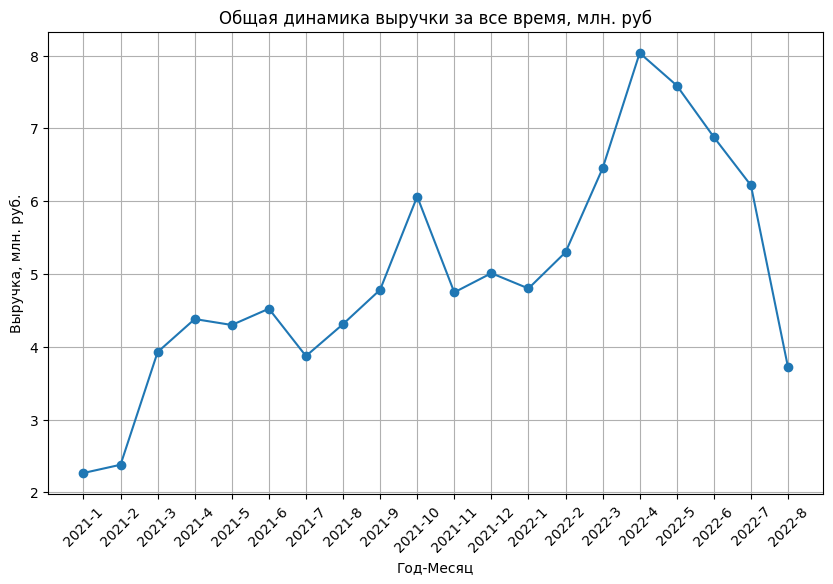

In [39]:
# Линейный график динамики
plt.figure(figsize=(10, 6))
plt.plot(result['year'].astype(str) + '-' + result['month'].astype(str), result['service_amount']/1000000, marker='o')
plt.xlabel('Год-Месяц')
plt.ylabel('Выручка, млн. руб.')
plt.title('Общая динамика выручки за все время, млн. руб')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Далее рассчитаем общую выручку по каждому году:

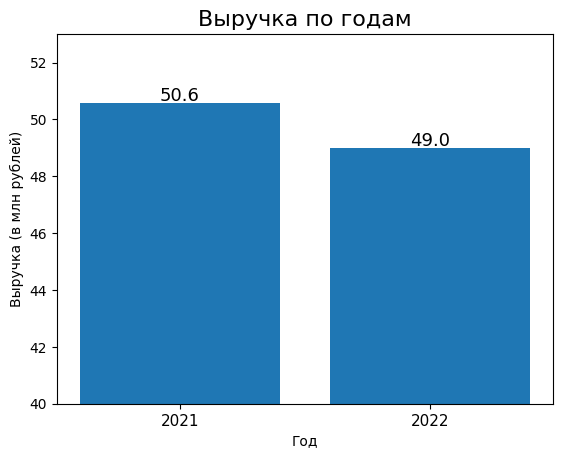

In [40]:
# Вычисляем общую выручку для каждого года
total_revenue_2021 = df_2021['service_amount'].sum() / 1e6  # Переводим в миллионы
total_revenue_2022 = df_2022['service_amount'].sum() / 1e6  # Переводим в миллионы

# Создаем столбчатую диаграмму
years = [2021, 2022]
revenues = [total_revenue_2021, total_revenue_2022]

plt.bar(years, revenues)
plt.xticks(years, fontsize=11)  # Указываем, какие значения отображать на оси X
plt.xlabel('Год')
plt.ylabel('Выручка (в млн рублей)')
plt.title('Выручка по годам', fontsize=16)

# Добавлеем надписи значений над столбцами
for i, value in enumerate(revenues):
    plt.text(years[i], value + 0.1, str(round(value, 1)), ha='center', fontsize=13)

# Устанавливаем диапазон оси Y
plt.ylim(40, 53)

plt.show()


Из графика мы видим, что в 2021 году на 1.6 млн. руб. было заработано больше.

Далее сравним выручку месяц к месяцу каждого года.

Для сравнения выручки по месяцам каждого года также построим графики для визуализации:

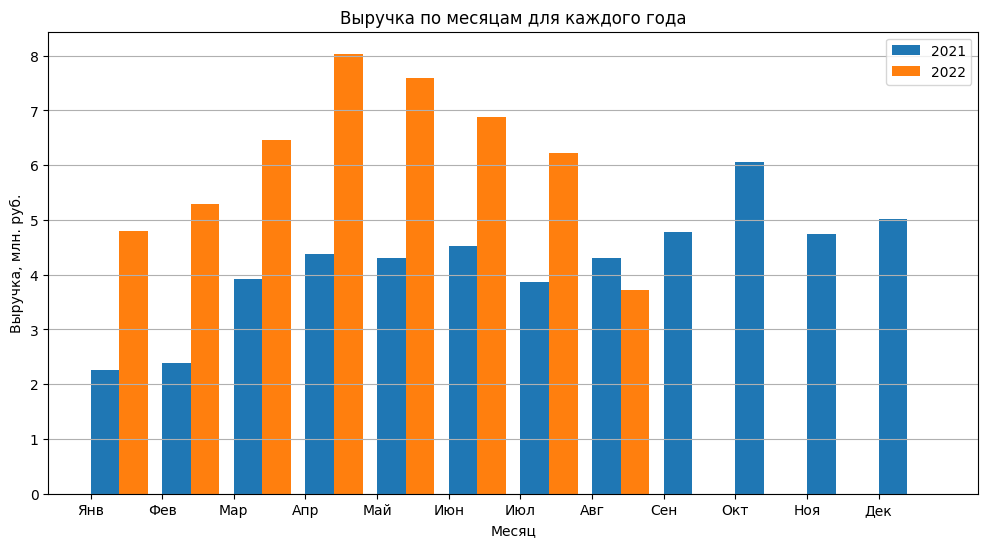

In [41]:
# Создаем список месяцев
months = range(1, 13)

# Создаем словарь для хранения выручки по месяцам и годам
revenue_by_month = {year: [] for year in df['year'].unique()}

# Заполняем словарь суммой выручки для каждого месяца
for year in df['year'].unique():
    for month in months:
        total_revenue = df[(df['year'] == year) & (df['month'] == month)]['service_amount'].sum()
        revenue_by_month[year].append(total_revenue / 1e6)  # Переводим в миллионы

# Строим столбчатую диаграмму
fig, ax = plt.subplots(figsize=(12, 6))

x = range(1, 13)  # 12 месяцев
bar_width = 0.4

# Отображаем выручку для каждого года
for year in df['year'].unique():
    ax.bar(x, revenue_by_month[year], width=bar_width, label=str(year), align='center')
    x = [i + bar_width for i in x]

ax.set_xlabel('Месяц')
ax.set_ylabel('Выручка, млн. руб.')
ax.set_title('Выручка по месяцам для каждого года')
ax.set_xticks([i - 0.2 for i in range(1, 13)])  # Добавляем смещение для более четкого отображения месяцев
ax.set_xticklabels(['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
ax.legend()

# Добавляем сетку
ax.grid(True, axis='y')

plt.show()


Можно сделать вывод, что выручка 22 года значительно выше в каждом месяце, для которых есть данные, по сравнению с месяцами в 21 году. Лишь в августе 22 выручка ниже, августа 21-го.

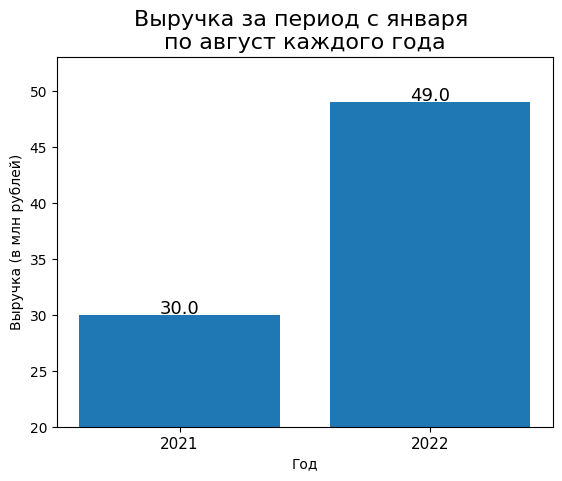

In [42]:
# Создаем фильтры для данных 2021 и 2022 годов с января по август
df_2021_filtered = df[(df['year'] == 2021) & (df['month'] >= 1) & (df['month'] <= 8)]
df_2022_filtered = df[(df['year'] == 2022) & (df['month'] >= 1) & (df['month'] <= 8)]

# Вычисляем общую выручку для каждого года
total_revenue_2021_filtered = df_2021_filtered['service_amount'].sum() / 1e6  # Переводим в миллионы
total_revenue_2022_filtered = df_2022_filtered['service_amount'].sum() / 1e6  # Переводим в миллионы

# Создаем столбчатую диаграмму
years = [2021, 2022]
revenues_filtered = [total_revenue_2021_filtered, total_revenue_2022_filtered]

plt.bar(years, revenues_filtered)
plt.xticks(years, fontsize=11)  # Указываем, какие значения отображать на оси X
plt.xlabel('Год')
plt.ylabel('Выручка (в млн рублей)')
plt.title('Выручка за период с января \n'
'по август каждого года', fontsize=16)

# Добавлеяем надписи с числом клиентов над столбцами
for i, value in enumerate(revenues_filtered):
    plt.text(years[i], value + 0.1, str(round(value, 1)), ha='center', fontsize=13)

# Устанавливаем диапазон оси Y
plt.ylim(20, 53)

plt.show()


На данном графике отображена общая выручка за период с января по август по каждому году, т. к. за эти месяцы есть данные и за 21 год (30 млн. руб) и за 22-й(49 млн. руб). Разница существенна - 19 млн. руб., **но это не как не объясняет, стало лечение дороже или нет**. \
Возможные объяснения этого роста могут включать увеличение числа клиентов, повышение числа визитов или расширение объема оказанных услуг.

## **Анализ среднего чека и средней стоимости одной услуги по годам**


In [43]:
# Рассчет среднего чека по каждому году
mean_price_2021 = df_2021['service_amount'].mean()
mean_price_2022 = df_2022['service_amount'].mean()

# Вывод результатов
print(f'Средний чек в 2021 году: {mean_price_2021:.2f} руб.')
print(f'Средний чек в 2022 году: {mean_price_2022:.2f} руб.')


Средний чек в 2021 году: 1138.98 руб.
Средний чек в 2022 году: 1195.47 руб.


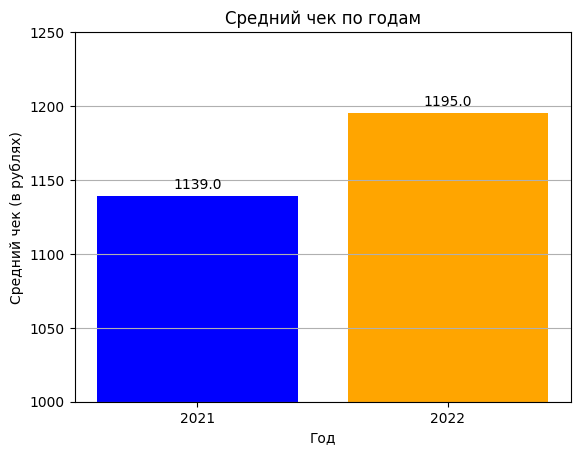

In [44]:
import matplotlib.pyplot as plt

# Рассчет среднего чека по каждому году
mean_price_2021 = df_2021['service_amount'].mean().round()
mean_price_2022 = df_2022['service_amount'].mean().round()

# Создание столбчатой диаграммы
years = [2021, 2022]
mean_prices = [mean_price_2021, mean_price_2022]

plt.bar(years, mean_prices, color=['blue', 'orange'])
plt.xticks(years)  # Указываем, какие значения отображать на оси X
plt.xlabel('Год')
plt.ylabel('Средний чек (в рублях)')
plt.title('Средний чек по годам')
plt.grid(axis='y')

# Добавление надписей с числом клиентов над столбцами
for i, value in enumerate(mean_prices):
    plt.text(years[i], value + 5, str(value), ha='center')

# Устанавливаем диапазон оси Y
plt.ylim(1000, 1250)
plt.show()


In [45]:
# Вычисляем среднюю стоимость одной услуги для каждого года
average_cost_2021 = df_2021['service_amount'].sum() / df_2021['service_number'].sum()
average_cost_2022 = df_2022['service_amount'].sum() / df_2022['service_number'].sum()

# Вычисляем процентное изменение цены одной услуги в 2022 году по отношению к 2021 году
percentage_change = ((average_cost_2022 - average_cost_2021) / average_cost_2021) * 100

print(f'Средняя стоимость одной услуги в 2021 году: {average_cost_2021:.2f} рублей')
print(f'Средняя стоимость одной услуги в 2022 году: {average_cost_2022:.2f} рублей')
print(f'Процентное изменение цены на услугу в 2022 году по отношению к 2021 году: {percentage_change:.2f}%')


Средняя стоимость одной услуги в 2021 году: 1111.42 рублей
Средняя стоимость одной услуги в 2022 году: 1171.15 рублей
Процентное изменение цены на услугу в 2022 году по отношению к 2021 году: 5.37%


### Выводы по первой гипотезе

Из полученных расчетов видно - **средний чек** в 22-м году составил 1195 руб. Это на 4.9% больше, чем в 21-м: 1139 руб. \
**Средняя стоимость** услуги увеличилась с 1111 рублей в 2021 году до 1171 рублей в 2022 году, что составляет прирост на 5.37%. Однако, это увеличение цены на услугу оказалось ниже, чем уровень инфляции.

В 2022 году официальный уровень инфляция составил 11.94%, что означает, что в среднем цены на товары и услуги увеличились на 11.94%. В то время как средняя стоимость одной услуги увеличилась всего на 5.37% по отношению к стоимости услуги в 2021 году. Парадокс - стоимость услуг в 22-ом стала выше, чем в 21-ом,  но услуги стали относительно более доступными для клиентов в 2022 году, по сравнению с общим уровнем инфляции.

Следовательно, гипотиза "Стоимость лечения увеличилась, так как увеличился общий уровень инфляции в стране в 22 году" **не отвергается**.


## Анализ среднего возроста клиентов в 2021 году и в 2022 году

Постоим гисторграмму распределения, если гистограмма 2022 года значительно смещена в право, значит гипотиза о влиянии возроста на стоимость не отвергается.

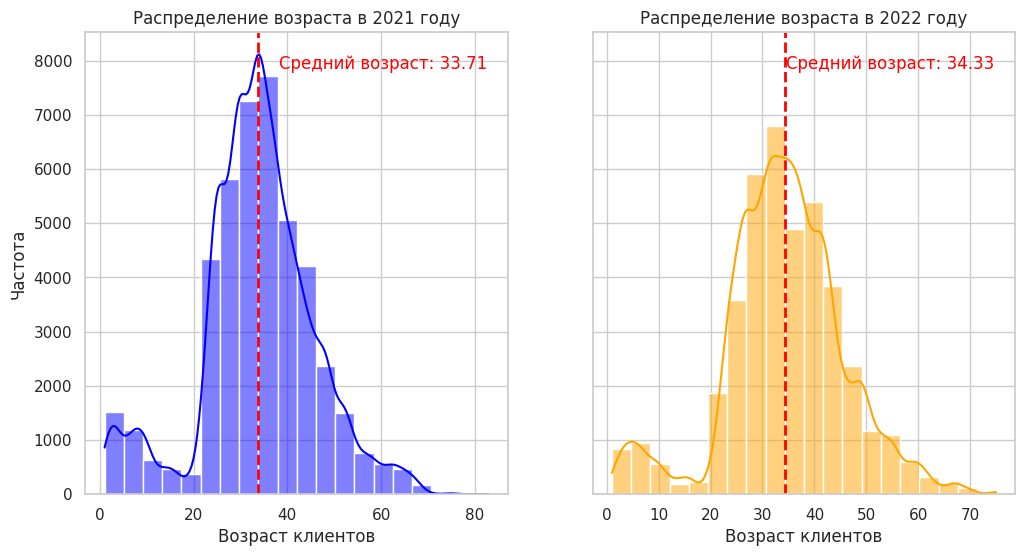

In [46]:
# Установливаем стиль графика seaborn для лучшей визуализации
sns.set(style="whitegrid")

# Создаем фигуру с двумя подграфиками
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# Гистограмма для 2021 года
sns.histplot(df_2021['age_for_service_date'], bins=20, kde=True, ax=axes[0], color='blue')
mean_age_2021 = df_2021['age_for_service_date'].mean()
axes[0].axvline(mean_age_2021, color='red', linestyle='dashed', linewidth=2)
axes[0].text(0.95, 0.95, f'Средний возраст: {mean_age_2021:.2f}', color='red', ha='right', va='top', transform=axes[0].transAxes)

# Подписываем оси
axes[0].set_title('Распределение возраста в 2021 году')
axes[0].set_xlabel('Возраст клиентов')
axes[0].set_ylabel('Частота')

# Гистограмма для 2022 года
sns.histplot(df_2022['age_for_service_date'], bins=20, kde=True, ax=axes[1], color='orange')
mean_age_2022 = df_2022['age_for_service_date'].mean()
axes[1].axvline(mean_age_2022, color='red', linestyle='dashed', linewidth=2)
axes[1].text(0.95, 0.95, f'Средний возраст: {mean_age_2022:.2f}', color='red', ha='right', va='top', transform=axes[1].transAxes)

# Подписываем оси
axes[1].set_title('Распределение возраста в 2022 году')
axes[1].set_xlabel('Возраст клиентов')

plt.show()


По графику можно судить, что количество клиентов изменилось, но изменения являются незначительными. Далее рассмотрим корреляцию между возрастом и стоимостью услуг, чтобы сделать окончательный вывод по гипотезе.

###  **Корреляция между возрастом и стоимостью услуг**



In [47]:
# Пример: Корреляция между возрастом и ценой услуги
correlation_age_price = df['age_for_service_date'].corr(df['service_amount']).round(3)
print(f'Корреляция между возрастом и ценой услуги: {correlation_age_price}')


Корреляция между возрастом и ценой услуги: 0.019


Как видно из расчёта, общая корреляция составляет 0.019, что говорит практически об отсутствии взаимосвязи возроста и стоимости улсуг. Посмотрим, как она выглядит на графике рассеивания:

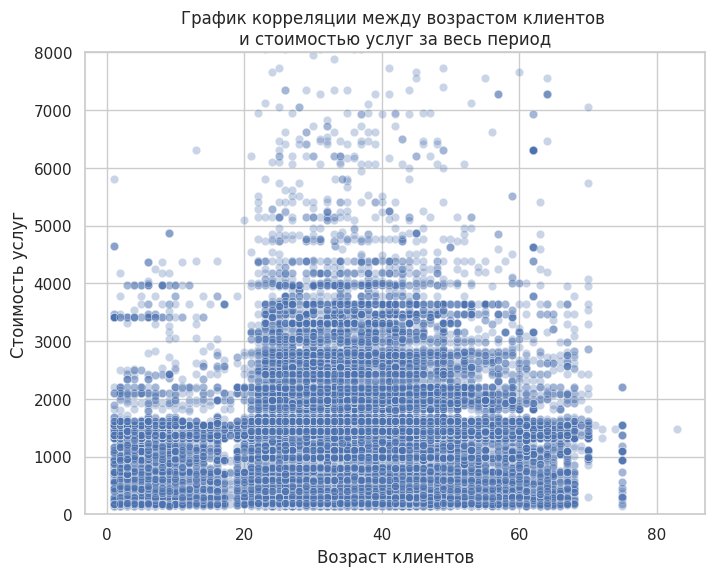

In [48]:
# Установите стиль графика seaborn для лучшей визуализации
sns.set(style="whitegrid")

# Построение графика корреляции
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age_for_service_date', y='service_amount', data=df, alpha=0.3)

# Добавление подписей осей и заголовка
plt.xlabel('Возраст клиентов')
plt.ylabel('Стоимость услуг')
plt.title('График корреляции между возрастом клиентов \n'
'и стоимостью услуг за весь период')

# Устанавливаем диапазон оси Y
plt.ylim(0, 8000)

# Отображение графика
plt.show()


### Выводы по второй гипотезе

График подтвердил расчет корреляции - взаимосвязь отсутствует. Можно сделать вывод, что стоимость услуг, а следовательно и стоимость лечения, не зависит от возраста.

Следовательно, гипотеза о том, что в 22-ом году стоимость лечения увеличилась из-за увеличения среднего возраста клиентов - чем старше человек, тем больше он обследуется и лечится, **отвергается**.

## **Проверга гипотизы "Курс доллара влияет на повышение стоимости лечения в 2022 году по отношению к 2021 году"**

Все данные о курсе доллора были получены на сайта Банка России ( [Динамика официального курса заданной валюты](https://www.cbr.ru/currency_base/dynamics/))

In [49]:
# создаю словарь `data` по курсу доллара с данными date и close
data = {
    "date": [
        "2021-01-01", "2021-02-01", "2021-03-01", "2021-04-01", "2021-05-01",
        "2021-06-01", "2021-07-01", "2021-08-01", "2021-09-01", "2021-10-01",
        "2021-11-01", "2021-12-01", "2022-01-01", "2022-02-01", "2022-03-01",
        "2022-04-01", "2022-05-01", "2022-06-01", "2022-07-01", "2022-08-01"
    ],
    "close": [
        76.0, 74.0, 76.0, 75.0, 73.0, 73.0, 73.0, 73.0, 73.0, 71.0, 74.0, 75.0,
        77.0, 104.0, 82.0, 71.0, 62.0, 54.0, 62.0, 59.0
    ]
}

# Создаем DataFrame из словаря
exchange_rate_data = pd.DataFrame(data)

# выводим полученный датафрейм по курсу доллара
exchange_rate_data

,date,close
0,2021-01-01,76.0
1,2021-02-01,74.0
2,2021-03-01,76.0
3,2021-04-01,75.0
4,2021-05-01,73.0
5,2021-06-01,73.0
6,2021-07-01,73.0
7,2021-08-01,73.0
8,2021-09-01,73.0
9,2021-10-01,71.0


In [50]:
# Преобразуем столбцы 'date' в формат datetime
exchange_rate_data['date'] = pd.to_datetime(exchange_rate_data['date'])

# Рассчитываем среднюю стоимость услуги для каждого месяца
mean_service_price_by_month = df.groupby(['year', 'month'])['service_amount'].mean().reset_index()

# Объединение по индексу курс доллора с данными
merged_data = mean_service_price_by_month.merge(exchange_rate_data, left_index=True, right_index=True)

# Рассчитываем корреляцию между средней стоимостью услуги и курсом доллара
correlation = mean_service_price_by_month['service_amount'].corr(merged_data['close'])

# Выводим результат
print(f'Корреляция между средней стоимостью услуги и курсом доллара: {correlation:.3f}')


Корреляция между средней стоимостью услуги и курсом доллара: -0.438


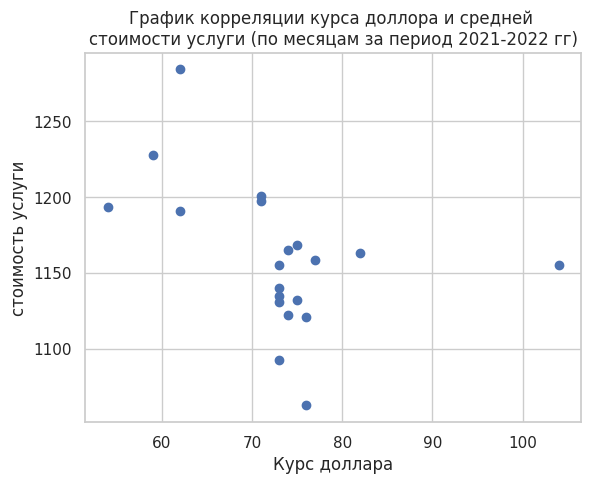

In [51]:
plt.scatter(merged_data['close'], merged_data['service_amount'])
plt.xlabel('Курс доллара')
plt.ylabel('стоимость услуги')
plt.title('График корреляции курса доллора и средней \n'
'стоимости услуги (по месяцам за период 2021-2022 гг)')

plt.show()


Интересный результат получился. Значение корреляции между средней стоимостью услуг за каждый месяц и курсом доллара за каждый месяц в период с 2021 по 2022 год равно -0.438. Зависимость обратная - чем больше курс доллора, тем ниже средняя стоимость услуги, следовательно, ниже стоимость лечения.

Далее, стоит сравнить динамики изменения средней стоимости услуг и курса доллара за все месяца.

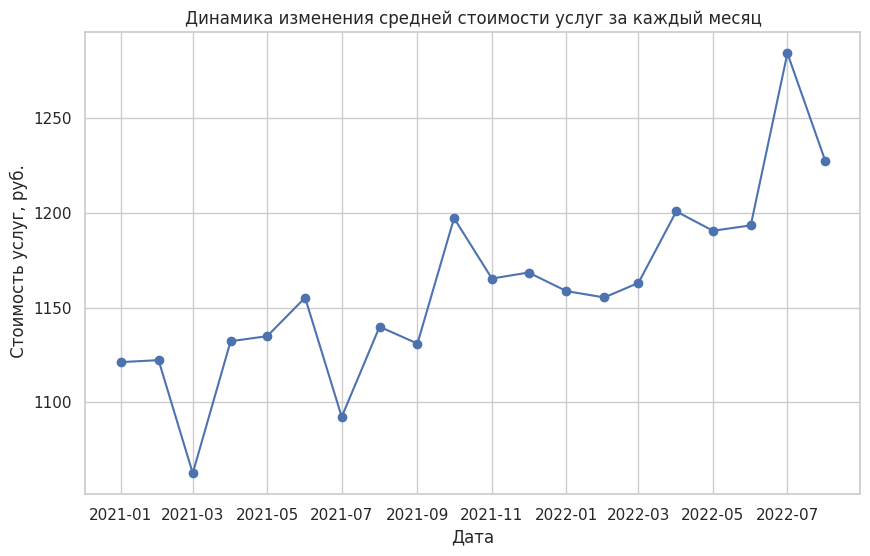

In [52]:
import matplotlib.pyplot as plt

# Построение графика динамики курса доллара
plt.figure(figsize=(10, 6))
plt.plot(merged_data['date'],  merged_data['service_amount'], marker='o', linestyle='-', color='b')
plt.title('Динамика изменения средней стоимости услуг за каждый месяц')
plt.xlabel('Дата')
plt.ylabel(' Стоимость услуг, руб.')
plt.grid(True)
plt.show()


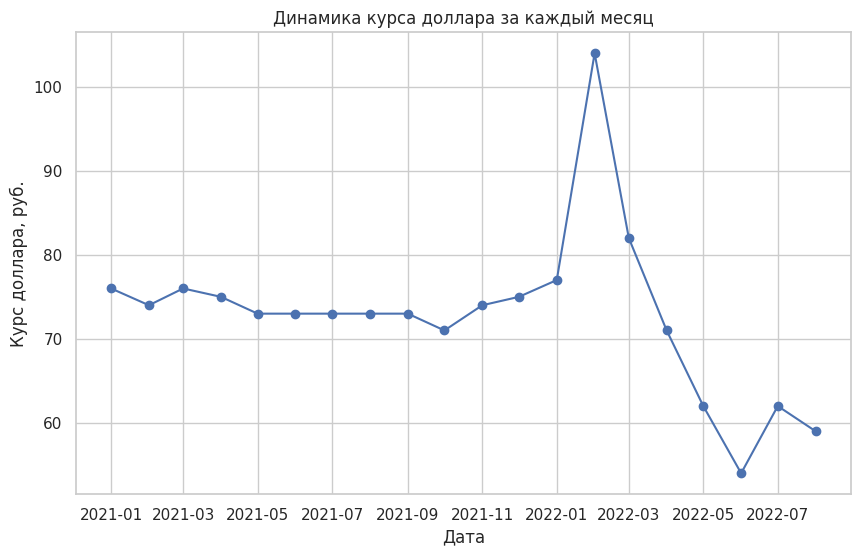

In [53]:
import matplotlib.pyplot as plt

# Построение графика динамики курса доллара
plt.figure(figsize=(10, 6))
plt.plot(exchange_rate_data['date'], exchange_rate_data['close'], marker='o', linestyle='-', color='b')
plt.title('Динамика курса доллара за каждый месяц')
plt.xlabel('Дата')
plt.ylabel('Курс доллара, руб.')
plt.grid(True)
plt.show()


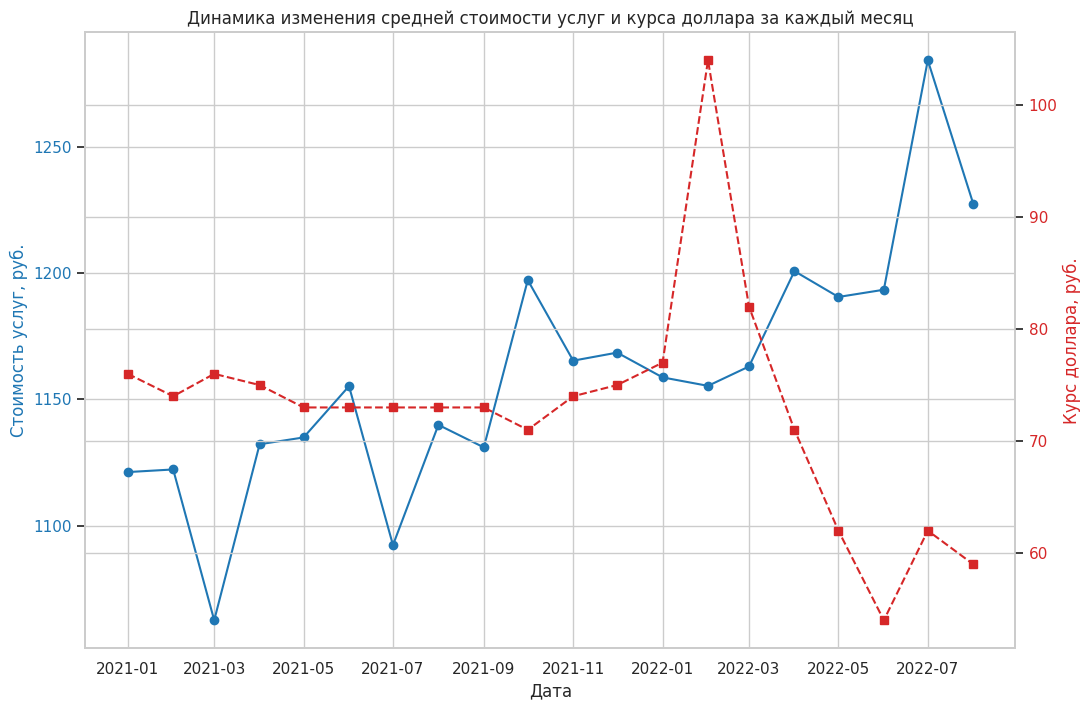

In [54]:
import matplotlib.pyplot as plt

# Создание фигуры
fig, ax1 = plt.subplots(figsize=(12, 8))

# График динамики средней стоимости услуг за каждый месяц
color = 'tab:blue'
ax1.set_xlabel('Дата')
ax1.set_ylabel('Стоимость услуг, руб.', color=color)
ax1.plot(merged_data['date'], merged_data['service_amount'], marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Создание второй оси y
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Курс доллара, руб.', color=color)
ax2.plot(exchange_rate_data['date'], exchange_rate_data['close'], marker='s', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Добавление заголовка и сетки
plt.title('Динамика изменения средней стоимости услуг и курса доллара за каждый месяц')
plt.grid(True)

# Отображение графика
plt.show()


### Выводы по третьей гипотезе:

На основе результатов проверки гипотезы можно сделать следующие выводы:

1. **Корреляция:**
   - Значение корреляции между средней стоимостью услуг за каждый месяц и курсом доллара в период с 2021 по 2022 год равно -0.438.

2. **Влияние на стоимость лечения:**
   - Обратная зависимость указывает на то, что при увеличении курса доллара средняя стоимость услуг снижается.

3. **Тенденция:**
   - Таким образом, результаты говорят в пользу того, что повышение курса доллара коррелирует с уменьшением стоимости предоставляемых медицинских услуг.

4. **Осторожность:**
   - Однако, стоит отметить, что корреляция не всегда означает причинно-следственную связь, и другие факторы также могут влиять на стоимость лечения.

Вывод: Гипотеза о влиянии роста курса доллара на повышение стоимости лечения **отвергается**. Наоборот, обратная зависимость указывает на возможное снижение стоимости медицинских услуг при увеличении курса доллара.

# Исследовательский анализ (дополнение)

## **Количество уникальных клиентов? Сколько клиентов было в каждый год? Динамика клиентов по месяцам.**

In [55]:
# подсчитаем уникальных клиентов
df['insured'].nunique()

4488

Всего 4488 уникальных клиентов обратились за 21-22 гг за услугами в медецинский центр.

In [56]:
# Создайте новые столбцы для года и месяца
df['year'] = df['service_date'].dt.year
df['month'] = df['service_date'].dt.month

# Группируйте данные по году и месяцу, а затем выполните агрегацию по уникальным клиентам
result = df.groupby(['year', 'month'])['insured'].nunique().reset_index()

# Результат будет содержать год, месяц и количество уникальных клиентов для каждой группы
print(result)

    year  month  insured
0   2021      1      286
1   2021      2      309
2   2021      3      446
3   2021      4      467
4   2021      5      469
5   2021      6      435
6   2021      7      447
7   2021      8      488
8   2021      9      559
9   2021     10      591
10  2021     11      539
11  2021     12      560
12  2022      1      555
13  2022      2      589
14  2022      3      662
15  2022      4      794
16  2022      5      802
17  2022      6      738
18  2022      7      641
19  2022      8      359


Посмотрим, какое количество уникальных клиентов было в каждый год:

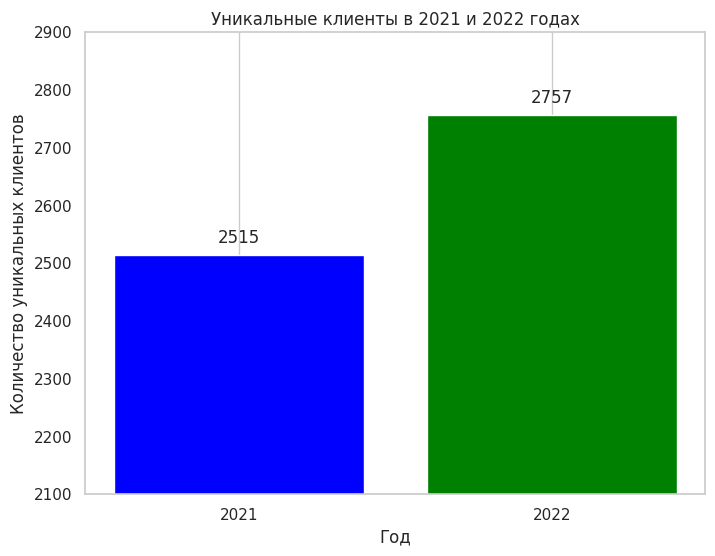

In [57]:
# Сгруппируем данные по году, а затем выполним агрегацию по уникальным клиентам
result_by_year = df.groupby(['year'])['insured'].nunique().reset_index()

# создаем переменные и кладем в них года и количество
years = result_by_year['year']
total_clients = result_by_year['insured']

# Строим столбчатую диаграмму
plt.figure(figsize=(8, 6))
plt.bar(years, total_clients, color=['blue', 'green'])
plt.xlabel('Год')
plt.ylabel('Количество уникальных клиентов')
plt.title('Уникальные клиенты в 2021 и 2022 годах')
plt.xticks(years)
plt.grid(axis='x')

# Добавление надписей с числом клиентов над столбцами
for i, value in enumerate(total_clients):
    plt.text(years[i], value + 20, str(value), ha='center')

# Устанавливаем диапазон оси Y
plt.ylim(2100, 2900)

plt.show()


Из графика видно, что количество клиентов в 22-ом было больше. \
Далее посмотрим относительное значение прироста клиентов в этом году.

In [58]:
# Создайте множества уникальных клиентов для 2021 и 2022 годов
unique_clients_2021 = set(df[df['year'] == 2021]['insured'])
unique_clients_2022 = set(df[df['year'] == 2022]['insured'])

# Вычислите разницу в количестве уникальных клиентов
difference = len(unique_clients_2022) - len(unique_clients_2021)

# Выразите разницу в процентах относительно 2021 года
percentage_difference = (difference / len(unique_clients_2021)) * 100

# Выведите результат
print(f'Разница в процентах в количестве уникальных клиентов между 2021 и 2022 годами: {percentage_difference:.2f}%')


Разница в процентах в количестве уникальных клиентов между 2021 и 2022 годами: 9.62%


На `9.62%` в 22-году клиентов было больше, чем в 21-ом.

Далее, посмотрим количество уникальных клиентов по месяцам каждого года и выведем график динамики изменения.

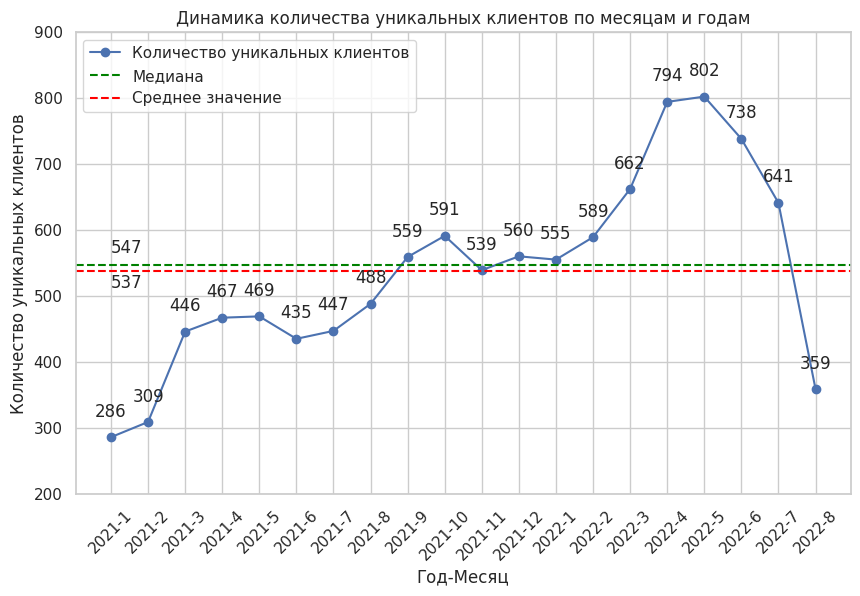

In [59]:
# Строим график динамики изменения количества уникальных клиентов
plt.figure(figsize=(10, 6))
plt.plot(result['year'].astype(str) + '-' + result['month'].astype(str), result['insured'], marker='o', label='Количество уникальных клиентов')
plt.xlabel('Год-Месяц')
plt.ylabel('Количество уникальных клиентов')
plt.title('Динамика количества уникальных клиентов по месяцам и годам')
plt.xticks(rotation=45)
plt.grid(True)

# Добавим метки значений для каждой точки
for i, (year_month, count) in enumerate(zip(result['year'].astype(str) + '-' + result['month'].astype(str), result['insured'])):
    plt.annotate(f'{count}', (year_month, count), textcoords="offset points", xytext=(0, 15), ha='center')

# Рассчитываем среднее и медианное значения, округляем их до целых
average_value = round(np.mean(result['insured']))
median_value = round(np.median(result['insured']))

# Добавляем зеленую пунктирную линию для медианы
plt.axhline(median_value, color='green', linestyle='--', label='Медиана')

# Выводим округленное значение медианы слегка над линией медианы
plt.text(result['year'].iloc[0].astype(str) + '-' + result['month'].iloc[0].astype(str), median_value + 18, f'{median_value}', ha='left')

# Добавляем красную пунктирную линию среднего значения
plt.axhline(average_value, color='red', linestyle='--', label='Среднее значение')

# Выводим округленное значение среднего под линией среднего
plt.text(result['year'].iloc[0].astype(str) + '-' + result['month'].iloc[0].astype(str), average_value - 25, f'{average_value}', ha='left')

# Устанавливаем диапазон оси Y на основе введенного значения
plt.ylim(200, 900)

# Добавляем легенду в левом верхнем углу
legend = plt.legend(loc='upper left')

# Скрыть/показать легенду
legend.set_visible(True)

plt.show()

Из графика видно, что количество клиентов плавно росло до февраля 2022 года, затем резко увеличилось. Пик роста пришёлся на май 2022 года (802 клиента), что практически в два раза больше, чем в мае 2021 года. После этого наблюдается резкий спад, который пришёлся на летний период. Количество клиентов сократилось до 359, что более чем в два раза меньше, чем максимальное значение в мае 2022 года.

На графике также видно три пиковых значения: весной и осенью 2021 года, а также весной 2022 года. В эти периоды, возможно, заболевания становятся более распространенными. Зимой и летом, напротив, наблюдается спад. Можно сделать вывод, что в бизнесе существует сезонный фактор.


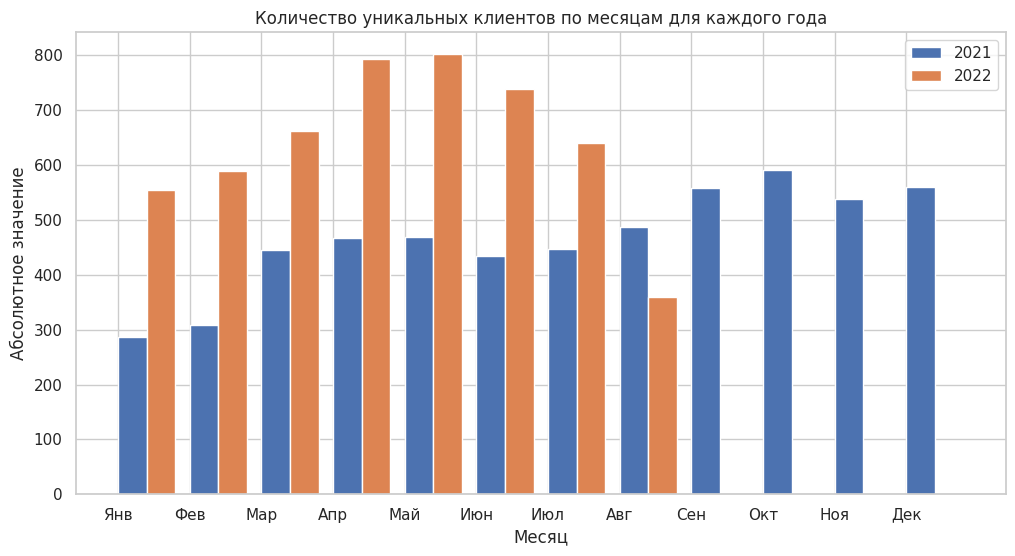

In [60]:
# Создайте список месяцев
months = range(1, 13)

# Создайте словарь для хранения количества уникальных клиентов по месяцам и годам
unique_clients_by_month = {year: [] for year in df['year'].unique()}

# Заполните словарь количеством уникальных клиентов для каждого месяца
for year in df['year'].unique():
    for month in months:
        unique_clients_by_month[year].append(len(set(df[(df['year'] == year) & (df['month'] == month)]['insured'])))

# Постройте столбчатую диаграмму
fig, ax = plt.subplots(figsize=(12, 6))

x = range(1, 13)  # 12 месяцев
bar_width = 0.4

# Отобразите количество уникальных клиентов для каждого года
for year in df['year'].unique():
    ax.bar(x, unique_clients_by_month[year], width=bar_width, label=str(year), align='center')
    x = [i + bar_width for i in x]

ax.set_xlabel('Месяц')
ax.set_ylabel('Абсолютное значение')
ax.set_title('Количество уникальных клиентов по месяцам для каждого года')
ax.set_xticks([i - 0.2 for i in range(1, 13)])  # Добавляем смещение для более четкого отображения месяцев
ax.set_xticklabels(['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
ax.legend()

# Добавляем сетку
ax.grid(True, axis='y')

plt.show()

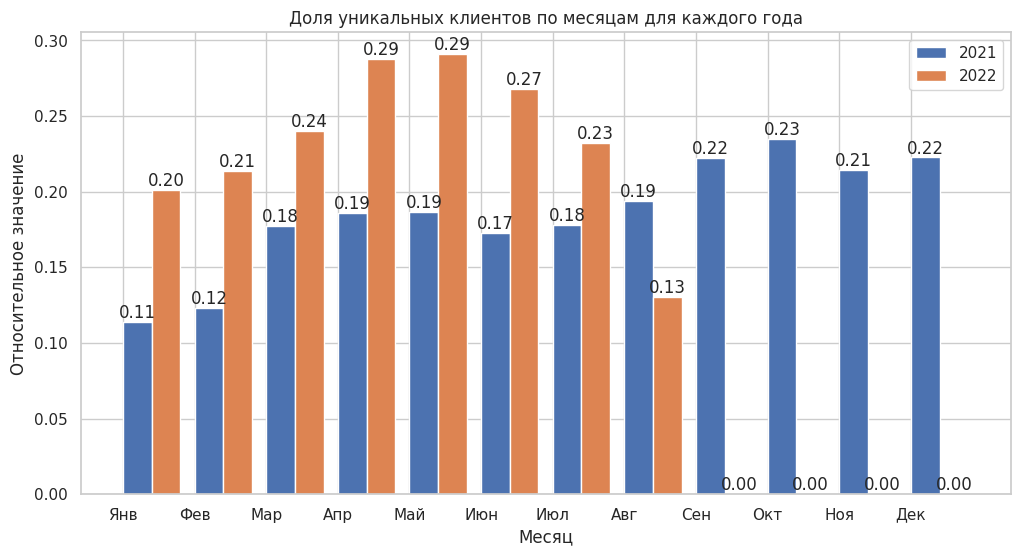

In [61]:
# Создайте список месяцев
months = range(1, 13)

# Создайте словарь для хранения количества уникальных клиентов по месяцам и годам
unique_clients_by_month = {year: [] for year in df['year'].unique()}

# Заполните словарь количеством уникальных клиентов для каждого месяца
for year in df['year'].unique():
    for month in months:
        unique_clients_by_month[year].append(len(set(df[(df['year'] == year) & (df['month'] == month)]['insured'])))

# Вычислите общее количество уникальных клиентов в каждом году
total_clients_by_year = {year: len(set(df[df['year'] == year]['insured'])) for year in df['year'].unique()}

# Постройте столбчатую диаграмму с относительными значениями и выводом значений
fig, ax = plt.subplots(figsize=(12, 6))

x = range(1, 13)  # 12 месяцев
bar_width = 0.4

# Отобразите относительное количество уникальных клиентов для каждого года
for year in df['year'].unique():
    relative_values = [count / total_clients_by_year[year] for count in unique_clients_by_month[year]]
    ax.bar(x, relative_values, width=bar_width, label=str(year), align='center')

    # Выведите значения на график
    for i, val in enumerate(relative_values):
        ax.text(x[i], val, f'{val:.2f}', ha='center', va='bottom')

    x = [i + bar_width for i in x]

ax.set_xlabel('Месяц')
ax.set_ylabel('Относительное значение')
ax.set_title('Доля уникальных клиентов по месяцам для каждого года')
ax.set_xticks([i - 0.2 for i in range(1, 13)])  # Добавляем смещение для более четкого отображения месяцев
ax.set_xticklabels(['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
ax.legend()

# Добавляем сетку
ax.grid(True, axis='y')

plt.show()


Видим, что в 22-м году рост клиентов был практически в каждом месяце на достаточно высоком уровне. Если провести расчет, то его среднее значение составит около 7% (за исключением месяцев без данных в 22-м году).

## **Динамика цен по каждой услуге**


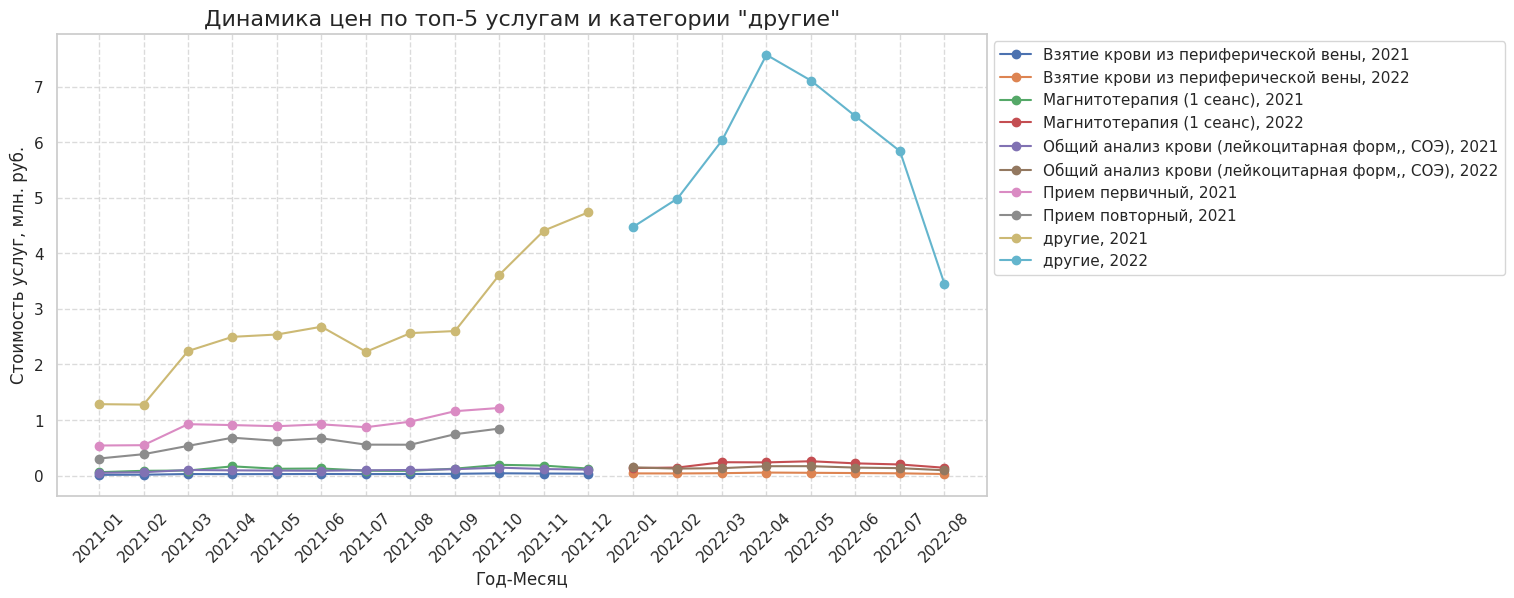

In [62]:
df_copy = df.copy()
# Определение топ-5 наименований услуг
top5_services = df_copy['service_name'].value_counts().head(5).index

# Замена всех других наименований на "другие" в копии датафрейма
df_copy['service_name'] = df_copy['service_name'].apply(lambda x: x if x in top5_services else 'другие')

# Группировка данных по году, месяцу, категории услуги и суммирование стоимости услуг
services_by_month = df_copy.groupby(['year', 'month', 'service_name'])['service_amount'].sum()

# Преобразование мультииндекса в DataFrame
services_by_month = services_by_month.reset_index()

# Создание графика
plt.figure(figsize=(12, 6))
for service, data in services_by_month.groupby('service_name'):
    for year, year_data in data.groupby('year'):
        # Создание меток для оси X, комбинируя год и месяц
        month_labels = [f'{y}-{m:02}' for y, m in year_data[['year', 'month']].values]
        plt.plot(month_labels, year_data['service_amount'] / 1e6, marker='o', label=f'{service}, {year}')

plt.title('Динамика цен по топ-5 услугам и категории "другие"', fontsize=16)
plt.xlabel('Год-Месяц')
plt.ylabel('Стоимость услуг, млн. руб.')  # Добавление "млн. руб." к подписи

plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Смещение легенды вправо

plt.grid(True, linestyle='--', alpha=0.7)

# Ограничение оси Y до первой цифры
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:0.0f}".format(x)))

plt.show()


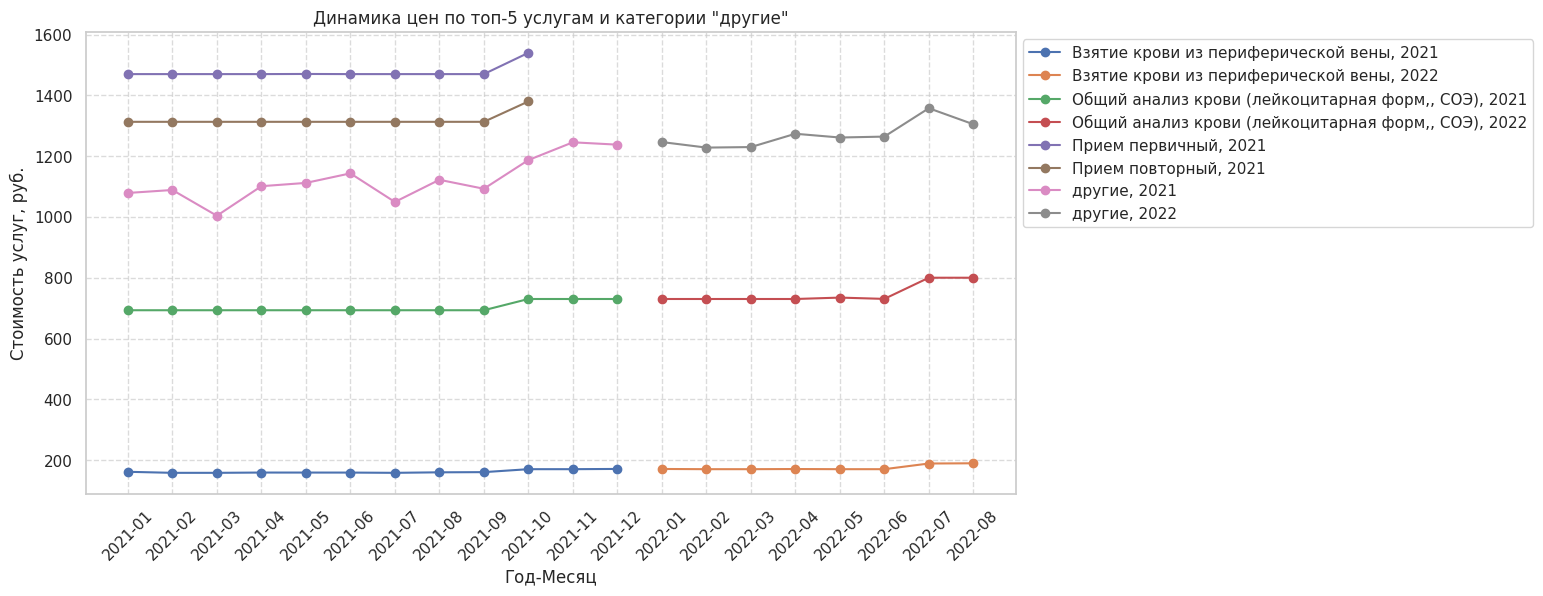

In [63]:
# Определение топ-5 наименований услуг
top5_services = df_copy['service_name'].value_counts().head(5).index

# Замена всех других наименований на "другие" в копии датафрейма
df_copy['service_name'] = df_copy['service_name'].apply(lambda x: x if x in top5_services else 'другие')

# Группировка данных по году, месяцу, категории услуги и суммирование стоимости услуг
services_by_month = df_copy.groupby(['year', 'month', 'service_name'])['service_amount'].mean()

# Преобразование мультииндекса в DataFrame
services_by_month = services_by_month.reset_index()

# Создание графика
plt.figure(figsize=(12, 6))
for service, data in services_by_month.groupby('service_name'):
    for year, year_data in data.groupby('year'):
        # Создание меток для оси X, комбинируя год и месяц
        month_labels = [f'{y}-{m:02}' for y, m in year_data[['year', 'month']].values]
        plt.plot(month_labels, year_data['service_amount'], marker='o', label=f'{service}, {year}')

plt.title('Динамика цен по топ-5 услугам и категории "другие"')
plt.xlabel('Год-Месяц')
plt.ylabel('Стоимость услуг, руб.')  # Добавление "млн. руб." к подписи

plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Смещение легенды вправо

plt.grid(True, linestyle='--', alpha=0.7)

# Ограничение оси Y до первой цифры
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:0.0f}".format(x)))

plt.show()


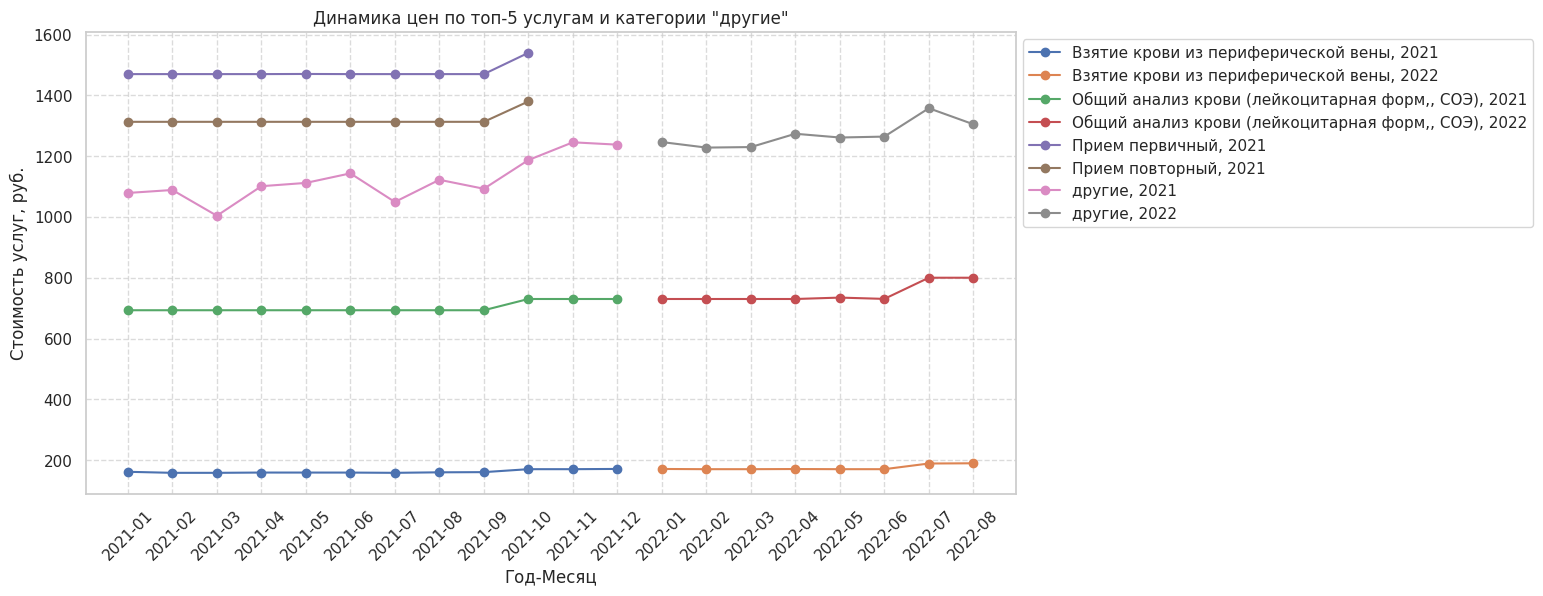

In [64]:
# Определение топ-5 наименований услуг
top5_services = df_copy['service_name'].value_counts().head(10).index

# Замена всех других наименований на "другие" в копии датафрейма
df_copy['service_name'] = df_copy['service_name'].apply(lambda x: x if x in top5_services else 'другие')

# Группировка данных по году, месяцу, категории услуги и суммирование стоимости услуг
services_by_month = df_copy.groupby(['year', 'month', 'service_name'])['service_amount'].mean()

# Преобразование мультииндекса в DataFrame
services_by_month = services_by_month.reset_index()

# Создание графика
plt.figure(figsize=(12, 6))
for service, data in services_by_month.groupby('service_name'):
    for year, year_data in data.groupby('year'):
        # Создание меток для оси X, комбинируя год и месяц
        month_labels = [f'{y}-{m:02}' for y, m in year_data[['year', 'month']].values]
        plt.plot(month_labels, year_data['service_amount'], marker='o', label=f'{service}, {year}')

plt.title('Динамика цен по топ-5 услугам и категории "другие"')
plt.xlabel('Год-Месяц')
plt.ylabel('Стоимость услуг, руб.')  # Добавление "млн. руб." к подписи

plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Смещение легенды вправо

plt.grid(True, linestyle='--', alpha=0.7)

# Ограничение оси Y до первой цифры
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:0.0f}".format(x)))

plt.show()


## **Сколько услуг оказано в каждом году? Какое количество услуг приходится на каждого клиента? Распределение количества услуг по клиентам.**



In [65]:
# Подсчитаем общее количество
print('Общее количество оказанных услуг:', df['service_number'].sum(), '(100%)')

Общее количество оказанных услуг: 87321 (100%)



Далее, посмотрим количество услуг по каждому месяцу каждого года. Для этого постром столбчатую диаграмму, чтобы сравнить месяц к месяцу.

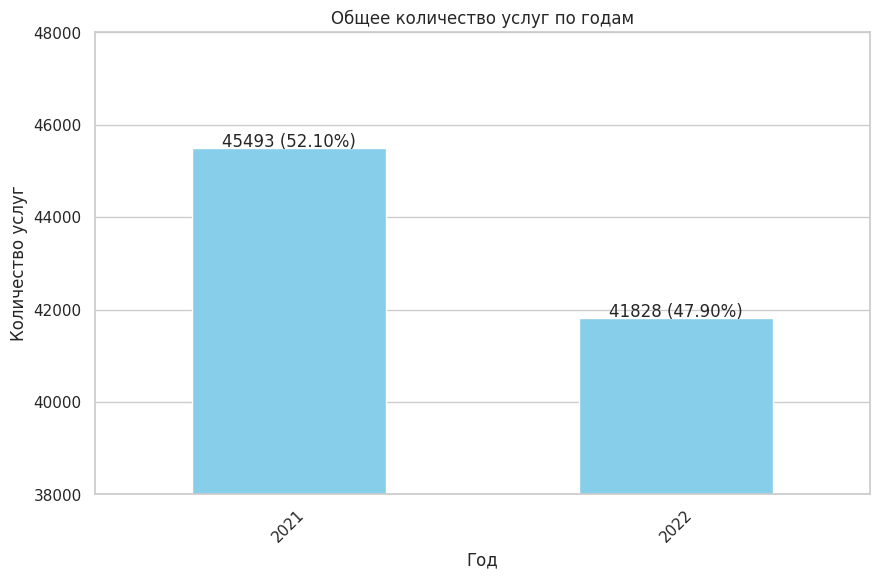

In [83]:
# Группировка данных по году и суммирование количества услуг
services_by_year = df.groupby('year')['service_number'].sum()

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
services_by_year.plot(kind='bar', color='skyblue')
plt.title('Общее количество услуг по годам')
plt.xlabel('Год')
plt.ylabel('Количество услуг')
plt.xticks(rotation=45)
plt.grid(axis='x')

# Добавление надписей с числом услуг и их долей над столбцами
for i, value in enumerate(services_by_year):
    percent = (value / services_by_year.sum()) * 100
    label = f'{value} ({percent:.2f}%)'
    plt.text(i, value + 20, label, ha='center')

# Устанавливаем диапазон оси Y
plt.ylim(38000, 48000)

plt.show()


Интересно то, что в 2022 году было клиетов больше, но доля оказанных услуг на 4% меньше.

Посмотрим динамику количества оказанных услуг по месяцам каждого года:

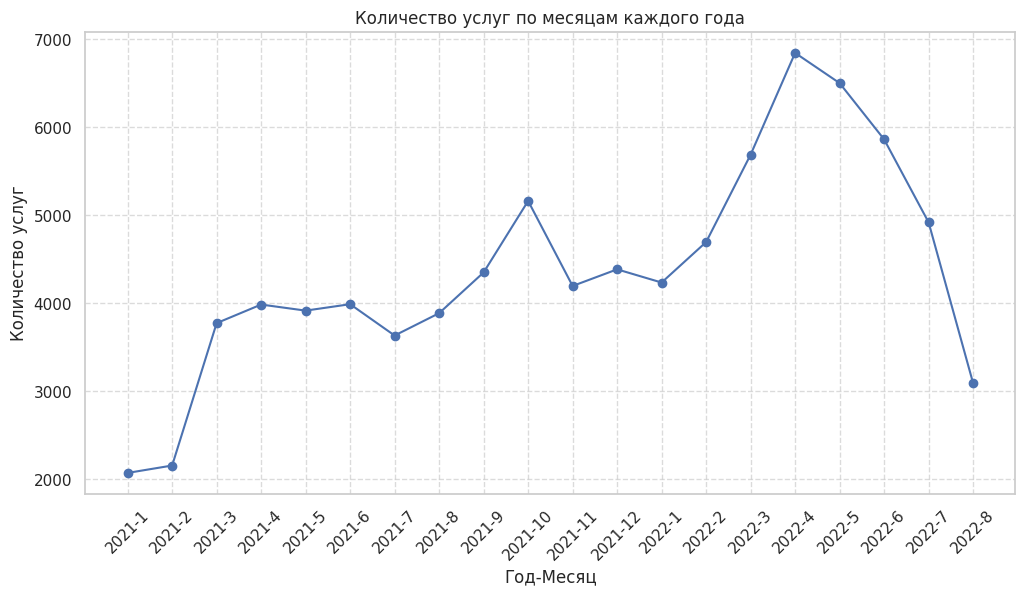

In [67]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt

# Группировка данных по столбцам "year" и "month" и подсчет количества услуг
services_by_month = df.groupby(['year', 'month'])['service_number'].sum()

# Преобразование мультииндекса в DataFrame
services_by_month = services_by_month.reset_index()

# Создание графика
plt.figure(figsize=(12, 6))
plt.plot(services_by_month['year'].astype(str) + '-' + services_by_month['month'].astype(str), services_by_month['service_number'], marker='o')
plt.title('Количество услуг по месяцам каждого года')
plt.xlabel('Год-Месяц')
plt.ylabel('Количество услуг')
plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Данный график коррелирует с динамикой клиентов. Рост клиентской базы соответственно влияет на увеличение оказанных услуг. На графике видны два ярко выраженных пика: октябрь 2021 года и апрель 2022 года.

Далее, посмотрим количество услуг по каждому клиенту и распределение количества услуг:

In [68]:
# Группировка данных по столбцу "insured" и подсчет количества услуг
services_per_client = df.groupby('insured')['service_number'].sum()

# Вывод таблицы
print(services_per_client.sort_values(ascending=False))


insured
418193    305
180725    239
544854    234
634801    209
402409    208
         ... 
192561      1
935481      1
935479      1
739409      1
512568      1
Name: service_number, Length: 4488, dtype: int64


Есть клиенты, которым за два года было оказано более 200 услуг, а одному даже более 300.

Посмотрим, какое среднее количество услуг пиходится на одного клиента за все время. Для этого построим гистаграмму расперделения:


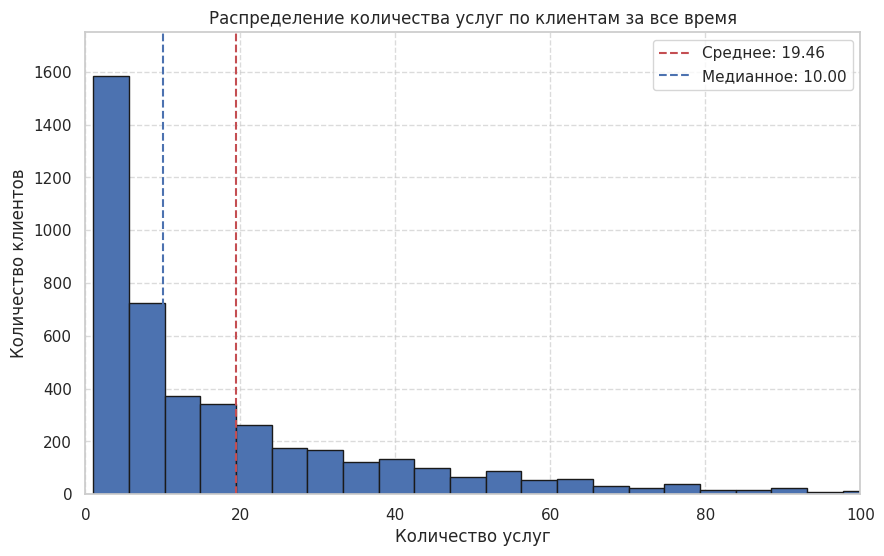

In [69]:
# Группировка данных по столбцу "insured" и подсчет количества услуг
services_per_client = df.groupby('insured')['service_number'].sum()

# Построение гистограммы
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(services_per_client, bins=66, edgecolor='k')
plt.title('Распределение количества услуг по клиентам за все время')
plt.xlabel('Количество услуг')
plt.ylabel('Количество клиентов')

# Добавление сетки
plt.grid(True, linestyle='--', alpha=0.7)

# Вычисление среднего и медианного значений
mean_services = services_per_client.mean()
median_services = services_per_client.median()

# Добавление вертикальных линий для среднего и медианного значений с подписями
plt.axvline(mean_services, color='r', linestyle='--', label=f'Среднее: {mean_services:.2f}')
plt.axvline(median_services, color='b', linestyle='--', label=f'Медианное: {median_services:.2f}')
plt.legend()

# Добавление возможности изменения диапазона на оси X и Y
plt.ylim(0, 1750)
plt.xlim(0, 100)

plt.show()

Учитывая наличие выбросов в данных, например, случаи, когда одному человеку оказывалось более 300 услуг, рекомендуется ориентироваться на медианное значение, которое составляет 10. Это означает, что в среднем на одного человека приходится 10 услуг. Медиана представляет собой более устойчивую метрику для анализа, поскольку она меньше подвержена воздействию аномалий и выбросов в данных.

## **Топ-10 популярных услуг**


In [70]:
# Получаем частоту каждой услуги
df['service_name'].value_counts().head(10)


Прием первичный                                  6058
Прием повторный                                  4477
Взятие крови из периферической вены              4215
Общий анализ крови (лейкоцитарная форм,, СОЭ)    3190
Магнитотерапия (1 сеанс)                         2838
Взятие мазка                                     1567
Общий анализ мочи                                1550
Лазеротерапия (1 сеанс)                          1313
Интерференционные токи (1 сеанс) (4 поля)        1195
Гинекологический мазок                           1194
Name: service_name, dtype: int64

Посмотрим, сколько вообще уникальных услуг:

In [71]:
# Получаем уникальное количество услуг
print('Клиника оказывает',df['service_name'].nunique(), 'уникальных услуг.')

Клиника оказывает 875 уникальных услуг.


Помстроим столбчатую диаграмму и посмотрим количество уникальных наименований услуг по годам:

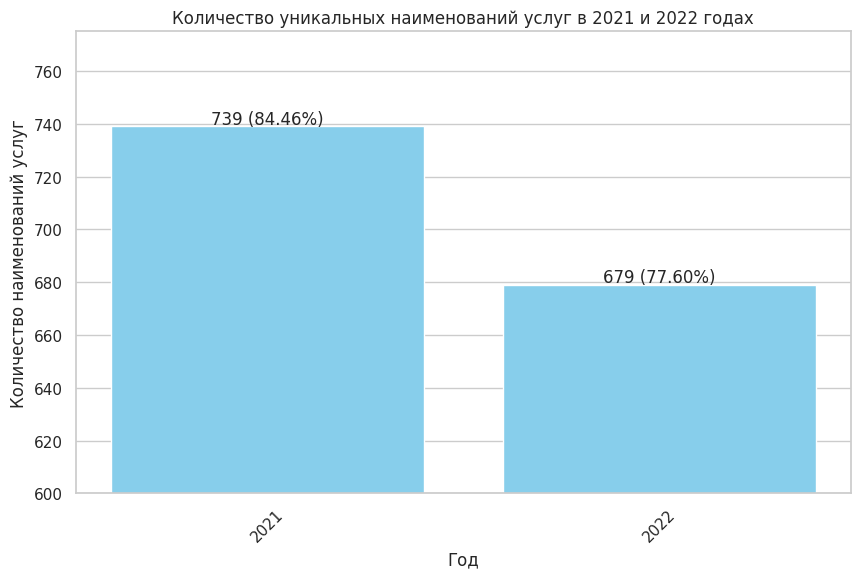

Клиника оказывает 875 уникальных услуг.


In [84]:
import matplotlib.pyplot as plt

# Фильтрация данных по году
df_2021 = df[df['year'] == 2021]
df_2022 = df[df['year'] == 2022]

# Нахождение уникального количества услуг для каждого года
unique_services_2021 = df_2021['service_name'].nunique()
unique_services_2022 = df_2022['service_name'].nunique()

# Нахождение общего количества уникальных услуг
total_unique_services = df['service_name'].nunique()

# Создание столбчатой диаграммы
years = [2021, 2022]
unique_services = [unique_services_2021, unique_services_2022]

plt.figure(figsize=(10, 6))
plt.bar(years, unique_services, color='skyblue')
plt.title('Количество уникальных наименований услуг в 2021 и 2022 годах')
plt.xlabel('Год')
plt.ylabel('Количество наименований услуг')
plt.xticks(years)
plt.xticks(rotation=45)
plt.grid(axis='x')

# Добавление значений над столбцами
for i, value in enumerate(unique_services):
    percent = (value / total_unique_services) * 100
    label = f'{value} ({percent:.2f}%)'
    plt.text(years[i], value + 1, label, ha='center')

# Добавление возможности изменения диапазона на оси Y
plt.ylim(600, 775)

plt.show()

# Вывод общего количества уникальных услуг
print('Клиника оказывает', total_unique_services, 'уникальных услуг.')


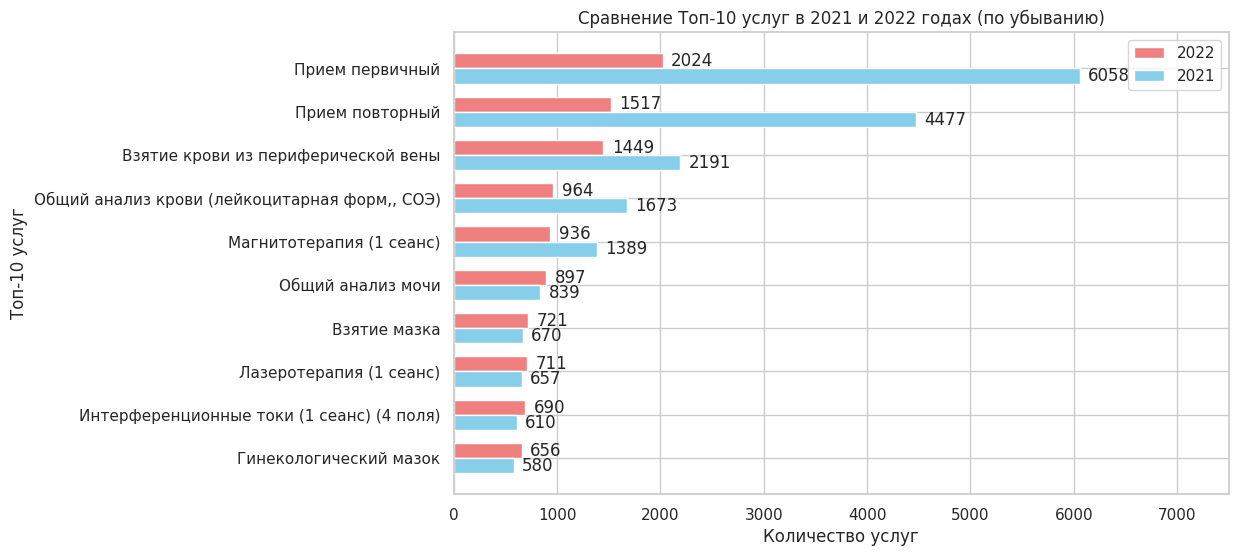

In [73]:
import matplotlib.pyplot as plt

# Топ 10 услуг в 2021 и 2022 годах
top_10_services_2021 = df_2021['service_name'].value_counts().head(10)
top_10_services_2022 = df_2022['service_name'].value_counts().head(10)

# Сортировка данных по убыванию
top_10_services_2021 = top_10_services_2021.sort_values(ascending=True)
top_10_services_2022 = top_10_services_2022.sort_values(ascending=True)

# Создание диаграммы
fig, ax = plt.subplots(figsize=(10, 6))

# Установка ширины столбцов
bar_width = 0.35

# Положение для каждой группы столбцов
y = range(len(top_10_services_2021))

# Построение столбцов для 2022 года
bar_2022 = ax.barh([i + bar_width for i in y], top_10_services_2022, height=bar_width, label='2022', color='lightcoral')

# Построение столбцов для 2021 года
bar_2021 = ax.barh(y, top_10_services_2021, height=bar_width, label='2021', color='skyblue')

# Настройка осей и заголовка
ax.set_ylabel('Топ-10 услуг')
ax.set_xlabel('Количество услуг')
ax.set_title('Сравнение Топ-10 услуг в 2021 и 2022 годах (по убыванию)')
ax.set_yticks([i + bar_width / 2 for i in y])
ax.set_yticklabels(top_10_services_2021.index)
ax.legend()

# Вывод значений рядом со столбцами
for bar in bar_2021 + bar_2022:
    width = bar.get_width()
    ax.annotate(f'{width}', xy=(width, bar.get_y() + bar.get_height() / 2), xytext=(6, 0), textcoords='offset points', va='center')

# Добавление возможности изменения диапазона на оси X
plt.xlim(0, 7500)

plt.show()


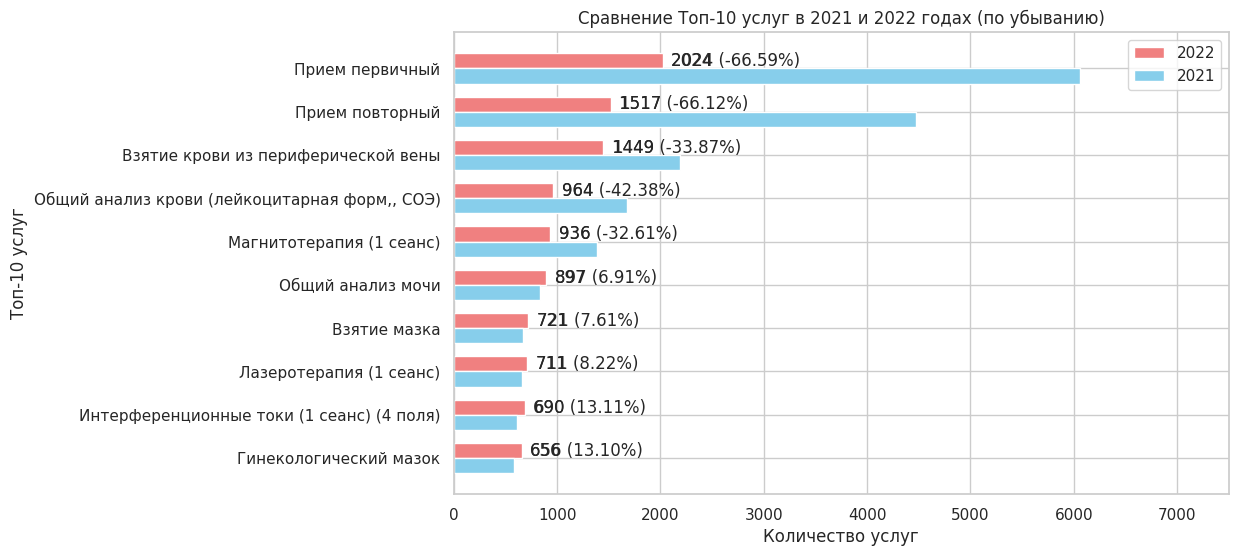

In [74]:
import matplotlib.pyplot as plt

# Топ 10 услуг в 2021 и 2022 годах
top_10_services_2021 = df_2021['service_name'].value_counts().head(10)
top_10_services_2022 = df_2022['service_name'].value_counts().head(10)

# Сортировка данных по убыванию
top_10_services_2021 = top_10_services_2021.sort_values(ascending=True)
top_10_services_2022 = top_10_services_2022.sort_values(ascending=True)

# Создание диаграммы
fig, ax = plt.subplots(figsize=(10, 6))

# Установка ширины столбцов
bar_width = 0.35

# Положение для каждой группы столбцов
y = range(len(top_10_services_2021))

# Построение столбцов для 2022 года
bar_2022 = ax.barh([i + bar_width for i in y], top_10_services_2022, height=bar_width, label='2022', color='lightcoral')

# Построение столбцов для 2021 года
bar_2021 = ax.barh(y, top_10_services_2021, height=bar_width, label='2021', color='skyblue')

# Настройка осей и заголовка
ax.set_ylabel('Топ-10 услуг')
ax.set_xlabel('Количество услуг')
ax.set_title('Сравнение Топ-10 услуг в 2021 и 2022 годах (по убыванию)')
ax.set_yticks([i + bar_width / 2 for i in y])
ax.set_yticklabels(top_10_services_2021.index)
ax.legend()

# Вывод значений рядом со столбцами
for i, (bar1, bar2) in enumerate(zip(bar_2021, bar_2022)):
    width1 = bar1.get_width()
    width2 = bar2.get_width()
    ax.annotate(f'{width2} ({((width2 - width1) / width1) * 100:.2f}%)', xy=(width2, bar2.get_y() + bar2.get_height() / 2), xytext=(6, 0), textcoords='offset points', va='center')
    ax.annotate(f'{width2}', xy=(width2, bar2.get_y() + bar2.get_height() / 2), xytext=(6, 0), textcoords='offset points', va='center')
# Добавление возможности изменения диапазона на оси X
plt.xlim(0, 7500)

plt.show()


Определим доли часто встречающихся наименования (топ-10 + "другие"):

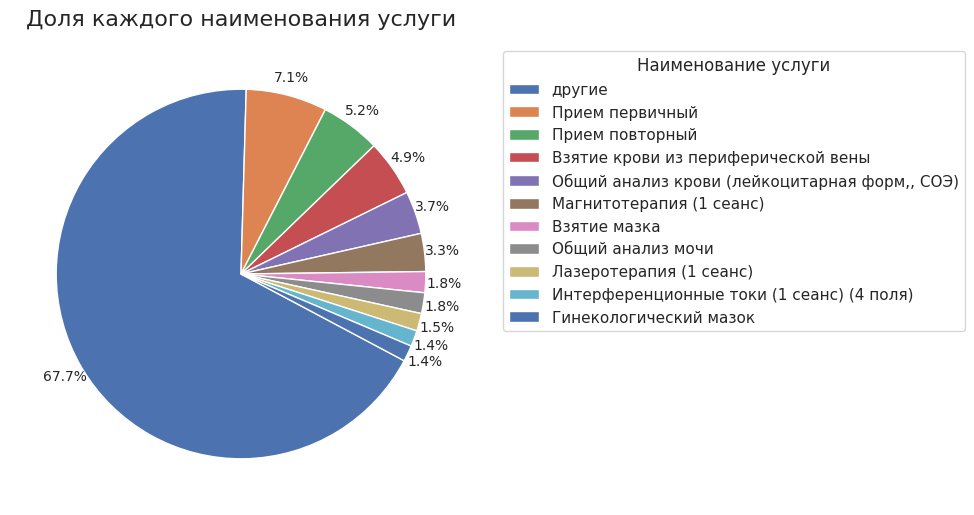

In [76]:
import matplotlib.pyplot as plt

# Создание копии датафрейма
df_copy = df.copy()

# Определение топ-10 наименований услуг
top_services = df_copy['service_name'].value_counts().head(10).index

# Замена всех других наименований на "другие" в копии датафрейма
df_copy['service_name'] = df_copy['service_name'].apply(lambda x: x if x in top_services else 'другие')

# Группировка данных по наименованию услуг и подсчет количества записей
service_counts = df_copy['service_name'].value_counts()

# Построение круговой диаграммы с расстоянием между процентами и названиями
plt.figure(figsize=(6, 6))
plt.pie(service_counts, labels=[''] * len(service_counts), autopct='%1.1f%%', pctdistance=1.1,
        labeldistance=1.2, startangle=332, textprops={'fontsize': 10}, counterclock=False)
plt.title('Доля каждого наименования услуги', y=1.02, fontsize=16)

# Создание легенды
plt.legend(service_counts.index, title="Наименование услуги", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


Из графика круговой диаграммы видно, что популярными услугами являются первичные и вторичные приемы, а также услуги, связанные с анализом крови. Общая доля этих четырех услуг составляет почти 21% (1/5 часть).

Посмотрим, какие услуги были популярны в 2021 году, а какие в 2022 году:

In [77]:
# Фильтрация данных для 2021 года
data_2021 = df[df['year'] == 2021]

# Фильтрация данных для 2022 года
data_2022 = df[df['year'] == 2022]

# Топ 10 услуг в 2021 году
top_10_services_2021 = data_2021['service_name'].value_counts().head(10)

# Топ 10 услуг в 2022 году
top_10_services_2022 = data_2022['service_name'].value_counts().head(10)

# Вывод таблицы для 2021 и 2022 годов
print("Топ 10 услуг в 2021 году:")
print(top_10_services_2021)

print("\nТоп 10 услуг в 2022 году:")
print(top_10_services_2022)


Топ 10 услуг в 2021 году:
Прием первичный                                  6058
Прием повторный                                  4477
Взятие крови из периферической вены              2191
Общий анализ крови (лейкоцитарная форм,, СОЭ)    1673
Магнитотерапия (1 сеанс)                         1389
Общий анализ мочи                                 839
Взятие мазка                                      670
Лазеротерапия (1 сеанс)                           657
Интерференционные токи (1 сеанс) (4 поля)         610
Гинекологический мазок                            580
Name: service_name, dtype: int64

Топ 10 услуг в 2022 году:
Взятие крови из периферической вены              2024
Общий анализ крови (лейкоцитарная форм,, СОЭ)    1517
Магнитотерапия (1 сеанс)                         1449
Прием гинеколога, повторный                       964
Прием трапевта, первичный                         936
Взятие мазка                                      897
Прием отоларинголога, первичный                   

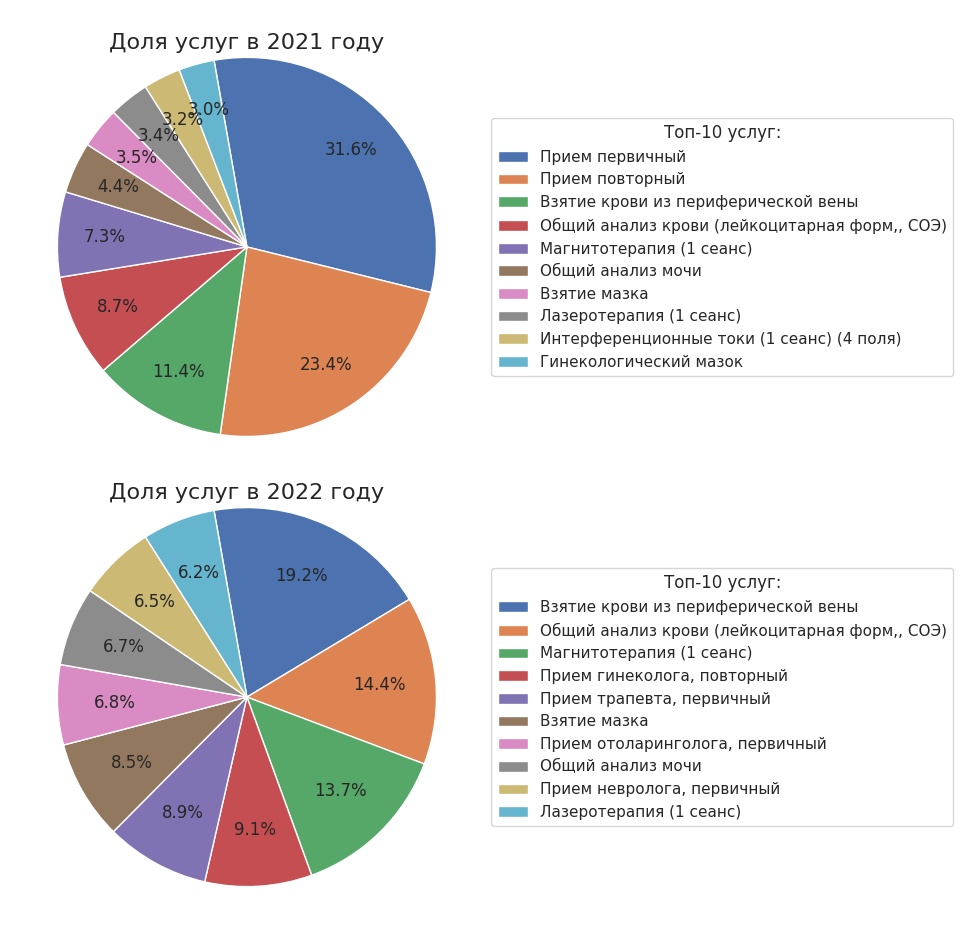

In [78]:
# Фильтрация данных для 2021 и 2022 годов
data_2021 = df[df['year'] == 2021]
data_2022 = df[df['year'] == 2022]

# Получение топ 10 услуг для каждого года, отсортированных по убыванию
top_10_services_2021 = data_2021['service_name'].value_counts().head(10)
top_10_services_2022 = data_2022['service_name'].value_counts().head(10)

# Создание графиков для 2021 и 2022 годов
fig, axs = plt.subplots(2, 1, figsize=(8, 12))

# Построение круговых диаграмм для 2021 и 2022 годов
axs[0].pie(top_10_services_2021, labels=None, autopct='%1.1f%%', pctdistance=0.75, startangle=100, counterclock=False)
axs[0].set_title('Доля услуг в 2021 году', y=0.9, fontsize=16)  # Установка позиции и размера заголовка
axs[1].pie(top_10_services_2022, labels=None, autopct='%1.1f%%', pctdistance=0.70, startangle=100, counterclock=False)
axs[1].set_title('Доля услуг в 2022 году', y=0.9, fontsize=16)  # Установка позиции и размера заголовка

# Добавление легенд
axs[0].legend(top_10_services_2021.index, title='Топ-10 услуг:', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
axs[1].legend(top_10_services_2022.index, title='Топ-10 услуг:', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Установка вертикального расстояния между графиками
plt.subplots_adjust(hspace=-0.05)

plt.show()


In [79]:
# Импорт библиотек
import pandas as pd
import plotly.express as px

# Группировка данных по наименованию услуги и суммирование стоимости услуг
services_total_revenue = df.groupby('service_name')['service_amount'].sum().reset_index()

# Вычисление общей суммы выручки
total_revenue = services_total_revenue['service_amount'].sum()

# Вычисление доли от общей выручки для каждой услуги
services_total_revenue['revenue_percentage'] = (services_total_revenue['service_amount'] / total_revenue)

# Определение топ-10 наименований услуг
top_services = df['service_name'].value_counts().head(10).index

# Фильтрация данных только для топ-10 услуг
top_services_data = services_total_revenue[services_total_revenue['service_name'].isin(top_services)]

# Создание пузырьковой диаграммы только для топ-10, но с долями от общей выручки
fig = px.scatter(top_services_data, x='service_name', y='service_amount',
                 size='service_amount', title='Выручка по топ-10 услугам',
                 labels={'service_name': 'Услуга', 'service_amount': 'Выручка', 'revenue_percentage': 'Доля от общей выручки'},
                 size_max=70)  # Здесь вы можете настроить размер кругов

# Добавление подписей значений долей
for i, row in top_services_data.iterrows():
    fig.add_annotation(x=row['service_name'], y=row['service_amount'],
                       text=f'{row["revenue_percentage"]*100:.2f}%', showarrow=False, font=dict(size=10))

fig.update_traces(textfont=dict(size=8, color='rgba(0,0,0,0)'))

fig.show()


In [80]:
# Группировка данных по наименованию услуги и суммирование стоимости услуг
services_total_revenue = df.groupby('service_name')['service_amount'].sum().reset_index()

# Вычисление общей суммы выручки
total_revenue = services_total_revenue['service_amount'].sum()

# Вычисление доли от общей выручки для каждой услуги
services_total_revenue['revenue_percentage'] = (services_total_revenue['service_amount'] / total_revenue)

# Определение топ-10 наименований услуг
top_services = df['service_name'].value_counts().head(10).index

# Фильтрация данных только для топ-10 услуг
top_services_data = services_total_revenue[services_total_revenue['service_name'].isin(top_services)]

# Создание пузырьковой диаграммы только для топ-10, но с долями от общей выручки
fig = px.scatter(top_services_data, x='service_name', y='service_amount',
                 size='service_amount', title='Выручка по топ-10 услугам',
                 labels={'service_name': 'Услуга', 'service_amount': 'Выручка', 'revenue_percentage': 'Доля от общей выручки'},
                 size_max=90, color='revenue_percentage', color_continuous_scale='Viridis')  # Здесь вы можете настроить размер кругов и цвета

# Добавление подписей значений долей
for i, row in top_services_data.iterrows():
    fig.add_annotation(x=row['service_name'], y=row['service_amount'],
                       text=f'{row["revenue_percentage"]*100:.2f}%', showarrow=False, font=dict(size=10, color='white'))


fig.update_traces(textfont=dict(size=8, color='rgba(0,0,0,0)'))

fig.show()


In [81]:
df['service_amount']

29       287
30       284
31       284
32       287
33       287
        ... 
85364    495
85365    800
85366    300
85367    410
85368    570
Name: service_amount, Length: 85369, dtype: int64

In [82]:
df['service_amount'].sum()

99548333

## **Анализ количества визитов.**

In [85]:
# Сгруппируйте данные по застрахованным пациентам и датам, подсчитав количество визитов
visits_count = df.groupby(['insured']).size().reset_index()

# Выведите результат
visits_count

,insured,0
0,125073,27
1,125094,19
2,125404,1
3,139315,3
4,139539,55
...,...,...
4483,1306765,11
4484,1306768,35
4485,1306775,31
4486,1306792,39


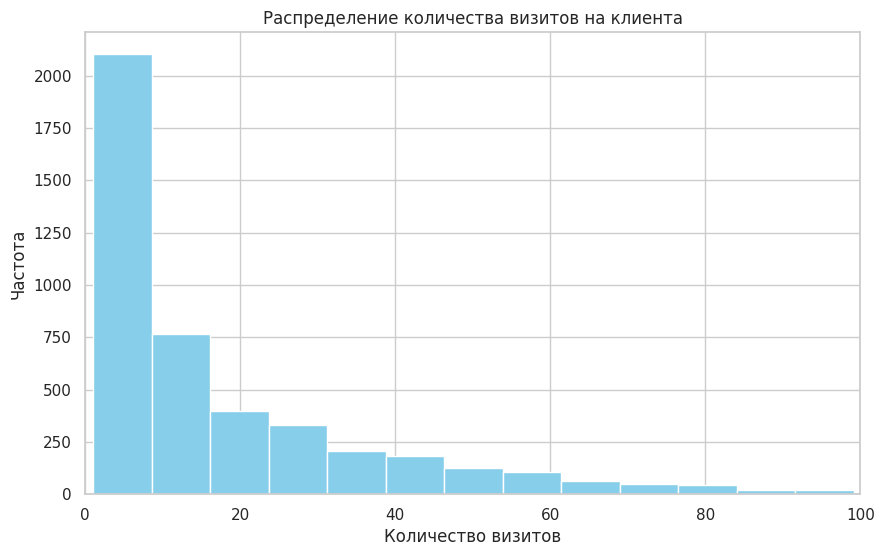

In [86]:
# Предположим, что вы хотите изменить диапазон оси x от 0 до 100
new_x_range = (0, 100)

# Постройте гистограмму распределения количества визитов
plt.figure(figsize=(10, 6))
plt.hist(visits_count[0], bins=40, color='skyblue')
plt.xlabel('Количество визитов')
plt.ylabel('Частота')
plt.title('Распределение количества визитов на клиента')
plt.grid(True)

# Установите новый диапазон на оси x
plt.xlim(new_x_range)

plt.show()

In [ ]:
# Сгруппируйте данные по застрахованным пациентам и датам, подсчитав количество визитов
visits_count_2021 = df_2021.groupby(['insured', 'service_date']).size().reset_index(name='visit_count')

# Выведите результат
print(visits_count_2021)

         insured service_date  visit_count
0         125073   2021-01-03            0
1         125073   2021-01-04            0
2         125073   2021-01-05            0
3         125073   2021-01-06            0
4         125073   2021-01-07            0
...          ...          ...          ...
1624651  1306795   2021-12-27            0
1624652  1306795   2021-12-28            0
1624653  1306795   2021-12-29            0
1624654  1306795   2021-12-30            0
1624655  1306795   2021-12-31            0

[1624656 rows x 3 columns]


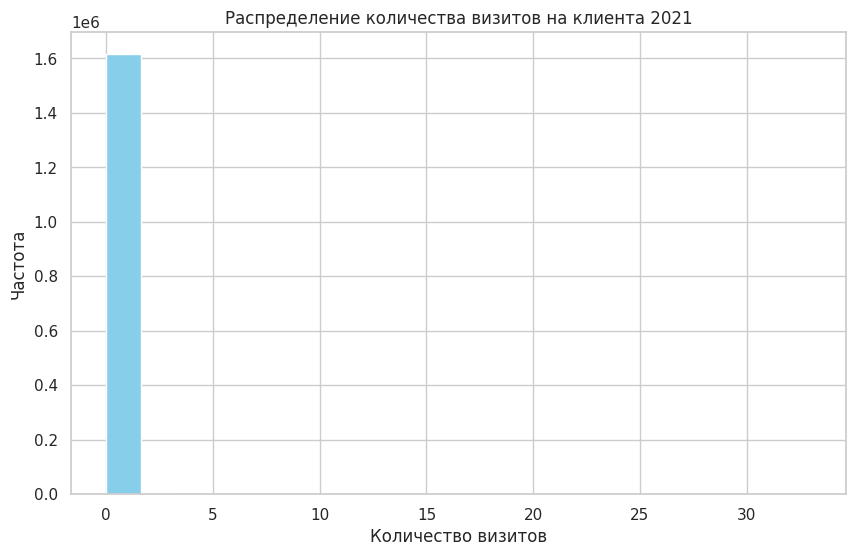

In [ ]:
# Постройте гистограмму распределения количества визитов
plt.figure(figsize=(10, 6))
plt.hist(visits_count_2021['visit_count'], bins=20, color='skyblue')
plt.xlabel('Количество визитов')
plt.ylabel('Частота')
plt.title('Распределение количества визитов на клиента 2021')
plt.grid(True)
plt.show()

In [ ]:
# Сгруппируйте данные по застрахованным пациентам и датам, подсчитав количество визитов
visits_count_2022 = df_2022.groupby(['insured', 'service_date']).size().reset_index(name='visit_count')

# Выведите результат
print(visits_count_2022['visit_count'].sum())

40977


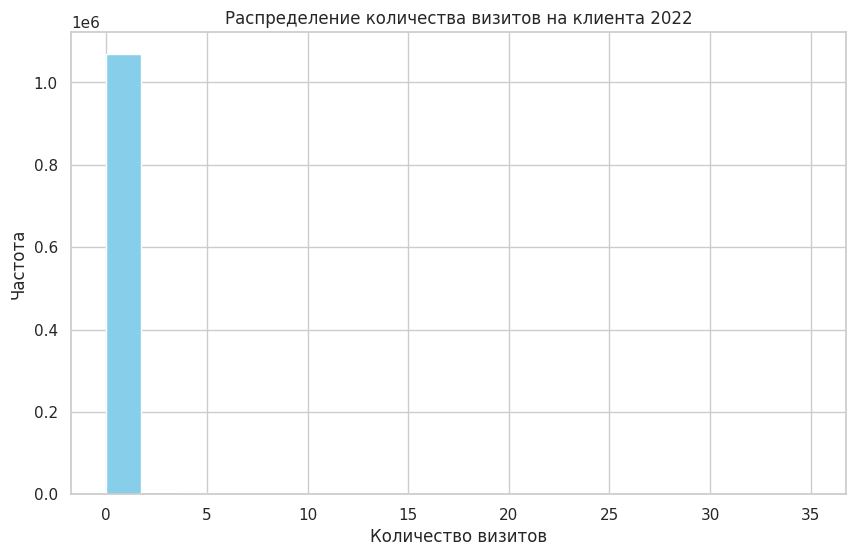

In [ ]:
# Постройте гистограмму распределения количества визитов
plt.figure(figsize=(10, 6))
plt.hist(visits_count_2022['visit_count'], bins=20, color='skyblue')
plt.xlabel('Количество визитов')
plt.ylabel('Частота')
plt.title('Распределение количества визитов на клиента 2022')
plt.grid(True)
plt.show()

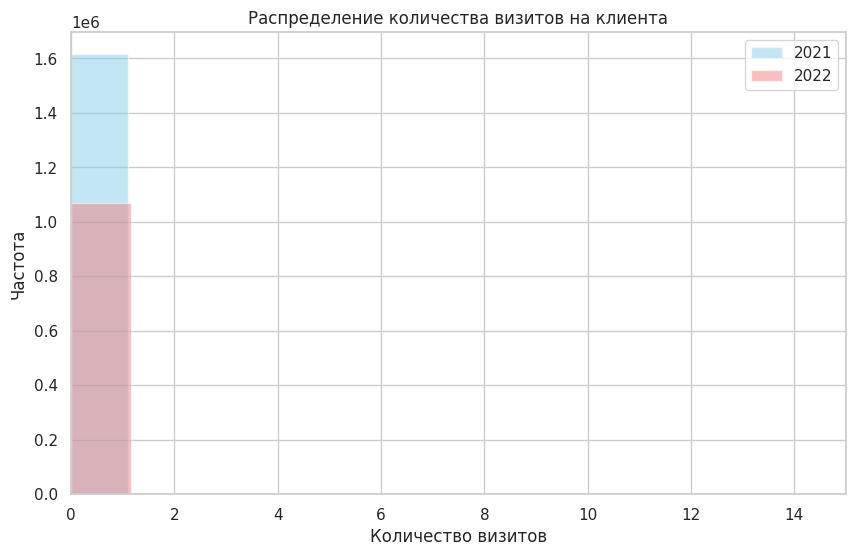

In [ ]:
import matplotlib.pyplot as plt

# Создайте фигуру и оси для графика
plt.figure(figsize=(10, 6))

# Постройте гистограмму для 2021 года
plt.hist(visits_count_2021['visit_count'], bins=30, color='skyblue', alpha=0.5, label='2021')
# Постройте гистограмму для 2022 года
plt.hist(visits_count_2022['visit_count'], bins=30, color='lightcoral', alpha=0.5, label='2022')

# Добавьте подписи осей и заголовок
plt.xlabel('Количество визитов')
plt.ylabel('Частота')
plt.title('Распределение количества визитов на клиента')

# Включите сетку
plt.grid(True)

# Выбор диапазона значение на оси x
plt.xlim(0, 15)
# Добавьте легенду
plt.legend()

# Покажите график
plt.show()


In [ ]:
df[df['service_name']== 'Постановка кожных аллергопроб (за 1 единицу)']

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,year,month
9050,30620900003,2021-04-03,Постановка кожных аллергопроб (за 1 единицу),2772,12,512453,1.0,29.0,2021,4
14404,30786241403,2021-05-15,Постановка кожных аллергопроб (за 1 единицу),3003,13,596505,1.0,33.0,2021,5
27232,31408744403,2021-09-09,Постановка кожных аллергопроб (за 1 единицу),231,1,490631,1.0,41.0,2021,9
27233,31408744503,2021-09-09,Постановка кожных аллергопроб (за 1 единицу),231,1,490631,1.0,41.0,2021,9
27234,31408744603,2021-09-09,Постановка кожных аллергопроб (за 1 единицу),231,1,490631,1.0,41.0,2021,9
27235,31408744703,2021-09-09,Постановка кожных аллергопроб (за 1 единицу),231,1,490631,1.0,41.0,2021,9
36313,31680597403,2021-11-20,Постановка кожных аллергопроб (за 1 единицу),3840,16,544906,1.0,31.0,2021,11
36853,31680651703,2021-11-02,Постановка кожных аллергопроб (за 1 единицу),1680,7,716108,1.0,27.0,2021,11
60790,32510836103,2022-04-30,Постановка кожных аллергопроб (за 1 единицу),240,1,935440,1.0,6.0,2022,4
60791,32510836203,2022-04-30,Постановка кожных аллергопроб (за 1 единицу),1200,5,935440,1.0,6.0,2022,4


# ВЫВОДЫ

Проект: Анализ изменения цены лечения в медицинской клинике

**Описание проекта:**
Провел анализ изменения цен в медицинской клинике за 2022 год относительно 2021 года.

**Цель проекта:**
Определить ключевые факторы, влияющие на изменение цены лечения.

**Задачи:**
1. Сформировать гипотезы.
2. Провести исследовательский анализ данных.
3. Сделать выводы по гипотезам.
4. Написать общий вывод.

Прежде чем начать анализ данных, предположил, что стоимость лечения возросла в 2022 году.

**Выдвинутые гипотезы:**
1. Стоимость лечения увеличилась из-за общего уровня инфляции в стране в 2022 году. (гипотеза
2. Увеличение среднего возраста клиентов привело к росту стоимости лечения.
3. Влияние роста курса доллара на повышение стоимости лечения.

**Выводы по первой гипотезе - не отвергается:**
Средний чек в 2022 году составил 1195 рублей, что на 4.9% больше, чем в 2021 году (1139 рублей). Средняя стоимость услуги выросла на 5.37%, что оказалось ниже уровня инфляции (11.94%). Таким образом, стоимость услуг в 2022 году стала выше, но оставалась более доступной для клиентов.

**Выводы по второй гипотезе - отвергается:**
График и расчет корреляции не выявили взаимосвязи между возрастом и стоимостью услуг. Следовательно, гипотеза о влиянии возраста клиентов на стоимость лечения отвергнута.

**Выводы по третьей гипотезе - отвергается.:**
Корреляция между средней стоимостью услуг и курсом доллара была -0.438, указывая на обратную зависимость. Это указывает на то, что при увеличении курса доллара средняя стоимость услуг снижается. Вывод: повышение курса доллара коррелирует с уменьшением стоимости медицинских услуг.

**Общий вывод:**
Рост стоимости услуг в 2022 году объясняется не только инфляцией, но и другими факторами. Влияние возраста клиентов на стоимость услуг не подтверждено, в то время как уменьшение стоимости услуг при росте курса доллара представляет собой интересную тенденцию. Однако стоит помнить, что корреляция не всегда свидетельствует о причинно-следственной связи, и другие факторы могут также влиять на стоимость лечения.